# Trabalho Prático 2 - ANADI

## Descrição do Trabalho
O objetivo principal deste trabalho consiste na aplicação de algoritmos de aprendizagem
automática na exploração de dados e respetiva comparação usando os testes
estatísticos mais adequados. Deve ser produzido um artigo científico (português ou
inglês), conforme template indicado, com o estado da arte sobre os diferentes
algoritmos, os modelos desenvolvidos, os resultados obtidos, a análise e discussão dos
resultados e as conclusões gerais do trabalho (síntese das conclusões).
Os dados consistem na estimativa dos níveis de obesidade em pessoas com idades entre
os 14 e os 61 anos e diversos hábitos alimentares e condições físicas. Foram recolhidos
dados de 2111 pessoas, nos quais foram obtidos 17 atributos relacionados com hábitos
alimentares e condição física dos participantes.

Os atributos relacionados com os hábitos alimentares são:

 FCCAC - Frequência de Consumo de Comida Altamente Calórica

 FCV - Frequência de Consumo de Vegetais

 NRP - Número de Refeições Principais

 CCER - Consumo de Comida Entre Refeições

 CA - Consumo de Água

 CBA - Consumo de Bebidas Alcoólicas

 MCC - Monitorização do Consumo Calorias

 Histórico de Obesidade Familiar


Os atributos relacionados com a condição física são:

 Género

 Idade

 Peso

 Altura

 FAF - Frequência de Atividade Física

 TUDE - Tempo de Utilização de Dispositivos Eletrónicos

 Fumador

 TRANS - Transporte utilizado

O atributo Label refere-se à categoria de risco de obesidade de cada indivíduo.
No âmbito da 2ª iteração do Trabalho Prático, pretende-se a realização o uma análise
exploratória dos dados disponibilizados, desenvolvendo modelos de regressão e
classificação que foram estudados na disciplina, ao longo do semestre: regressão
linear/múltipla, árvores de decisão, k-vizinhos-mais-próximos, redes neuronais e SVM. 

# 4.1 Regressão

1. Comece por carregar o ficheiro “Dados_Trabalho_TP2.csv” para o ambiente do
Python, verifique a sua dimensão e obtenha um sumário dos dados. 


In [197]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.linear_model import LinearRegression
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree, export_text
from sklearn.neural_network import MLPRegressor
from scipy.stats import friedmanchisquare, wilcoxon

data = pd.read_csv("Dados_Trabalho_TP2.csv" , index_col = 0)

print(data.describe()) ## sumário de dados

print("\nTamanho do DataFrame:")
print(data.shape)

print("\nDimensão dos dados:",data.ndim) ## dimensão dos dados (1 para série / 2 para dataset)


             Idade       Altura         Peso          FCV          NRP  \
count  2111.000000  2111.000000  2111.000000  2111.000000  2111.000000   
mean     24.312600     1.701677    86.586058     2.419043     2.685628   
std       6.345968     0.093305    26.191172     0.533927     0.778039   
min      14.000000     1.450000    39.000000     1.000000     1.000000   
25%      19.947192     1.630000    65.473343     2.000000     2.658738   
50%      22.777890     1.700499    83.000000     2.385502     3.000000   
75%      26.000000     1.768464   107.430682     3.000000     3.000000   
max      61.000000     1.980000   173.000000     3.000000     4.000000   

                CA          FAF         TUDE  
count  2111.000000  2111.000000  2111.000000  
mean      2.008011     1.010298     0.657866  
std       0.612953     0.850592     0.608927  
min       1.000000     0.000000     0.000000  
25%       1.584812     0.124505     0.000000  
50%       2.000000     1.000000     0.625350  
75% 

2. Derive um novo atributo, “IMC” usando a informação dos atributos do Peso e Altura.


In [198]:
data['IMC'] = data['Peso'] / (data['Altura'] ** 2) # Fórumula de cálculo IMC: IMC = Peso / Altura^2

data.head() # verifica-se que a coluna IMC foi adicionada

Genero  Idade  Altura  Peso Historico_obesidade_familiar FCCAC  FCV  \
0   Feminino   21.0    1.62  64.0                          Sim   Nao  2.0   
1   Feminino   21.0    1.52  56.0                          Sim   Nao  3.0   
2  Masculino   23.0    1.80  77.0                          Sim   Nao  2.0   
3  Masculino   27.0    1.80  87.0                          Nao   Nao  3.0   
4  Masculino   22.0    1.78  89.8                          Nao   Nao  2.0   

   NRP            CCER Fumador   CA  MCC  FAF  TUDE             CBA  \
0  3.0  Ocasionalmente     Nao  2.0  Nao  0.0   1.0             Nao   
1  3.0  Ocasionalmente     Sim  3.0  Sim  3.0   0.0  Ocasionalmente   
2  3.0  Ocasionalmente     Nao  2.0  Nao  2.0   1.0  Frequentemente   
3  3.0  Ocasionalmente     Nao  2.0  Nao  2.0   0.0  Frequentemente   
4  1.0  Ocasionalmente     Nao  2.0  Nao  0.0   0.0  Ocasionalmente   

                  TRANS                 Label        IMC  
0  Transportes_Publicos           Peso_Normal  24.386526  
1  Transportes_Publicos           Peso_Normal  24.238227  
2  Transportes_Publicos           Peso_Normal  23.765432  
3             Caminhada   Excesso_Peso_Grau_I  26.851852  
4  Transportes_Publicos  Excesso_Peso_Grau_II  28.342381

3. Analise os atributos do conjunto de dados mais significativos, usando gráficos,
análises estatísticas e/ou outros métodos apropriados.

<Axes: xlabel='Idade'>

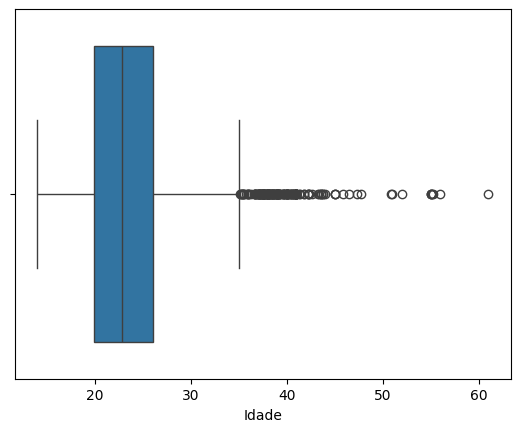

In [199]:
# Diagrama de Caixa de Bigodes da Idade
sns.boxplot(data = data, x = 'Idade')

<Axes: xlabel='Altura'>

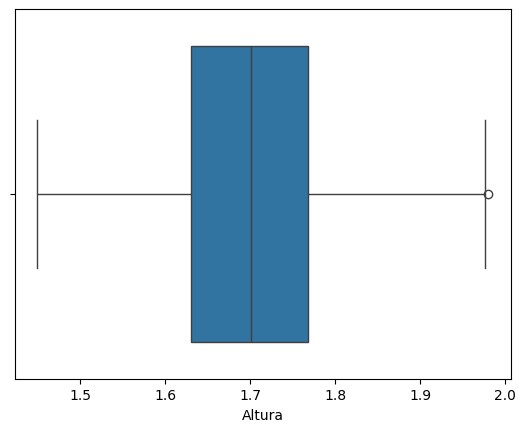

In [200]:
#Diagrama de Caixa de Bigodes da Altura
sns.boxplot(data = data, x = 'Altura')

<Axes: xlabel='Peso'>

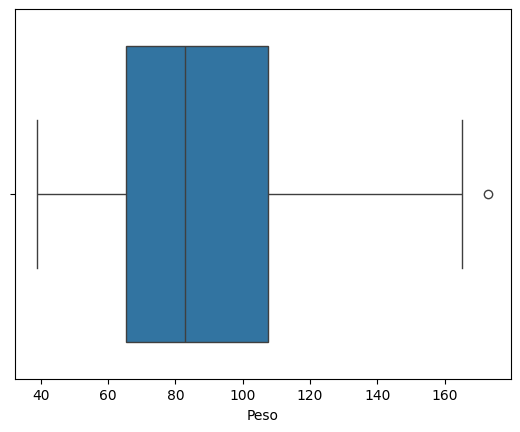

In [201]:
#Diagrama de Caixa de Bigodes do Peso
sns.boxplot(data = data, x = 'Peso')

<Axes: xlabel='FCV'>

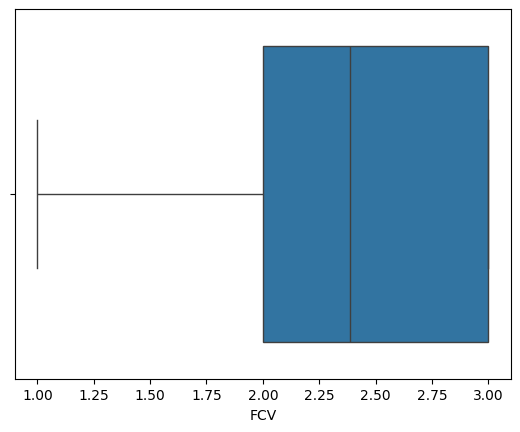

In [202]:
#Diagrama de Caixa de Bigodes do FCV - Frequência de Consumo de Vegetais
sns.boxplot(data = data, x = 'FCV')

<Axes: xlabel='NRP'>

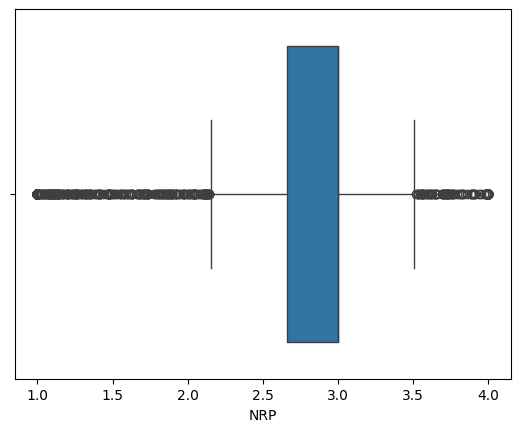

In [203]:
#Diagrama de Caixa de Bigodes do NRP - Número de Refeições Principais
sns.boxplot(data = data, x = 'NRP')

<Axes: xlabel='CA'>

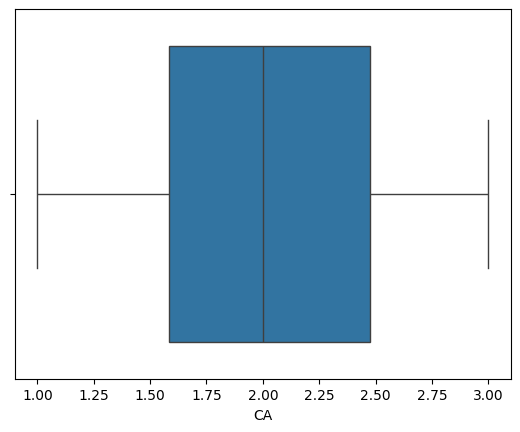

In [204]:
#Diagrama de Caixa de Bigodes do CA - Consumo de Água
sns.boxplot(data = data, x = 'CA')

<Axes: xlabel='FAF'>

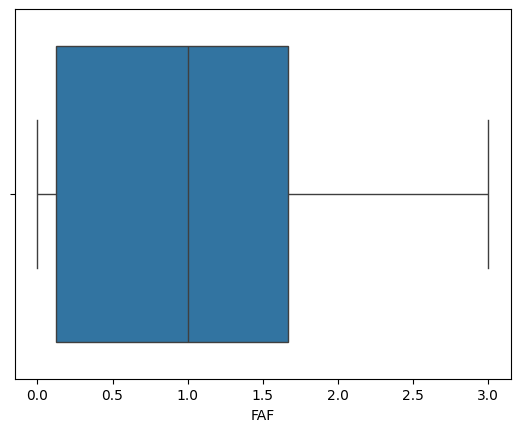

In [205]:
#Diagrama de Caixa de Bigodes do FAF - Frequência de Atividade Física
sns.boxplot(data = data, x = 'FAF')

<Axes: xlabel='TUDE'>

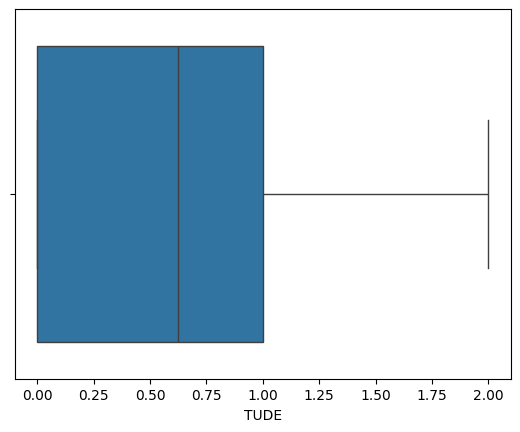

In [206]:
#Diagrama de Caixa de Bigodes do TUDE - Tempo de Utilização de Dispositivos Eletrónicos
sns.boxplot(data = data, x = 'TUDE')

<Axes: xlabel='IMC'>

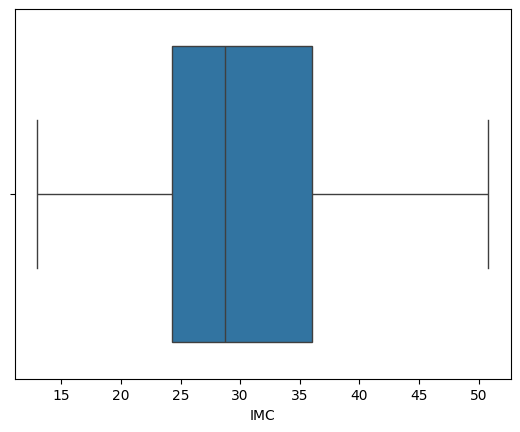

In [207]:
#Diagrama de Caixa de Bigodes do IMC - Indíce de Massa Corporal
sns.boxplot(data = data, x = 'IMC')

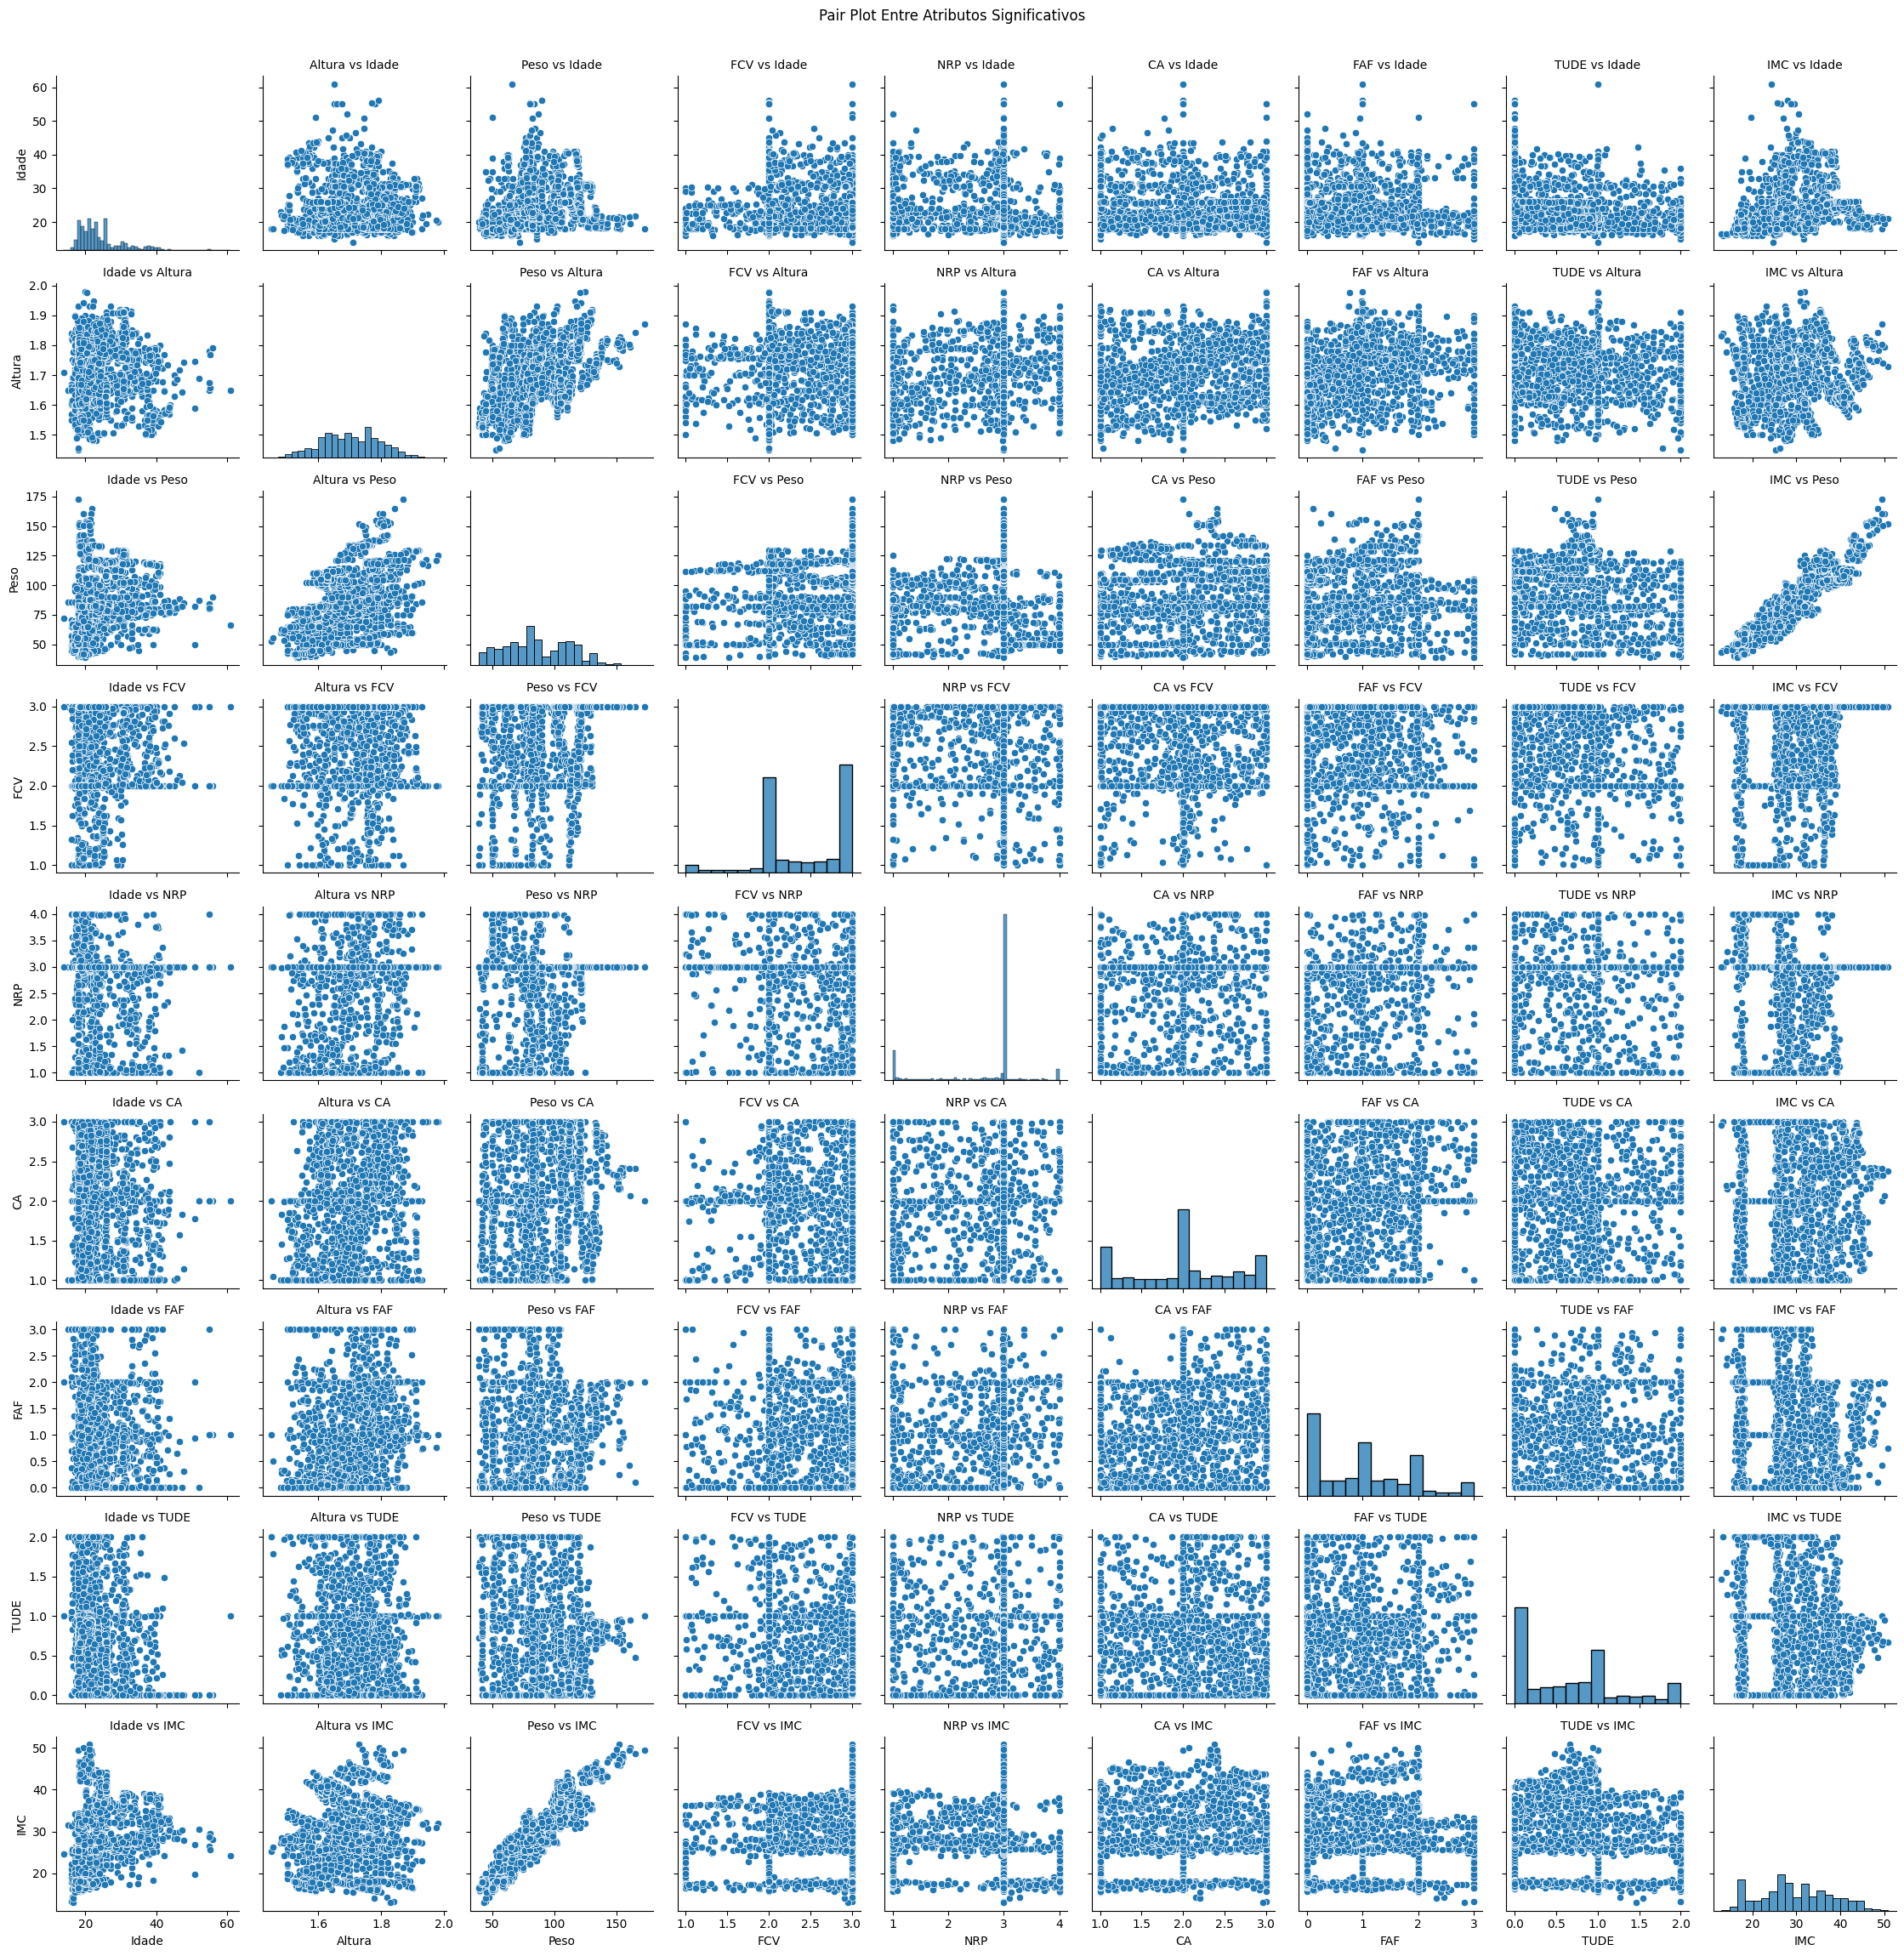

In [208]:
# Converter variáveis categóricas em variáveis numéricas
data_encoded = pd.get_dummies(data)

# Gerar os Diagramas de Pares para os Atributos Significantes
g = sns.pairplot(data, vars=['Idade', 'Altura', 'Peso', 'FCV', 'NRP', 'CA', 'FAF', 'TUDE', 'IMC'])

# Adicionar titulos a cada gráfico
for i, ax in enumerate(g.axes.flatten()):
    # Extrair títulos para o eixo do x e o eixo do y
    xlabel = ax.get_xlabel()
    ylabel = ax.get_ylabel()
    if xlabel and ylabel: 
        ax.set_title(f'{xlabel} vs {ylabel}', fontsize=10)

# Apresentar os diagramas com os títulos adicionados
plt.tight_layout()
plt.suptitle("Pair Plot Entre Atributos Significativos", y=1.02)
plt.show()

In [209]:
#Sumário de Dados
data.describe()

Idade       Altura         Peso          FCV          NRP  \
count  2111.000000  2111.000000  2111.000000  2111.000000  2111.000000   
mean     24.312600     1.701677    86.586058     2.419043     2.685628   
std       6.345968     0.093305    26.191172     0.533927     0.778039   
min      14.000000     1.450000    39.000000     1.000000     1.000000   
25%      19.947192     1.630000    65.473343     2.000000     2.658738   
50%      22.777890     1.700499    83.000000     2.385502     3.000000   
75%      26.000000     1.768464   107.430682     3.000000     3.000000   
max      61.000000     1.980000   173.000000     3.000000     4.000000   

                CA          FAF         TUDE          IMC  
count  2111.000000  2111.000000  2111.000000  2111.000000  
mean      2.008011     1.010298     0.657866    29.700159  
std       0.612953     0.850592     0.608927     8.011337  
min       1.000000     0.000000     0.000000    12.998685  
25%       1.584812     0.124505     0.000000    24.325802  
50%       2.000000     1.000000     0.625350    28.719089  
75%       2.477420     1.666678     1.000000    36.016501  
max       3.000000     3.000000     2.000000    50.811753

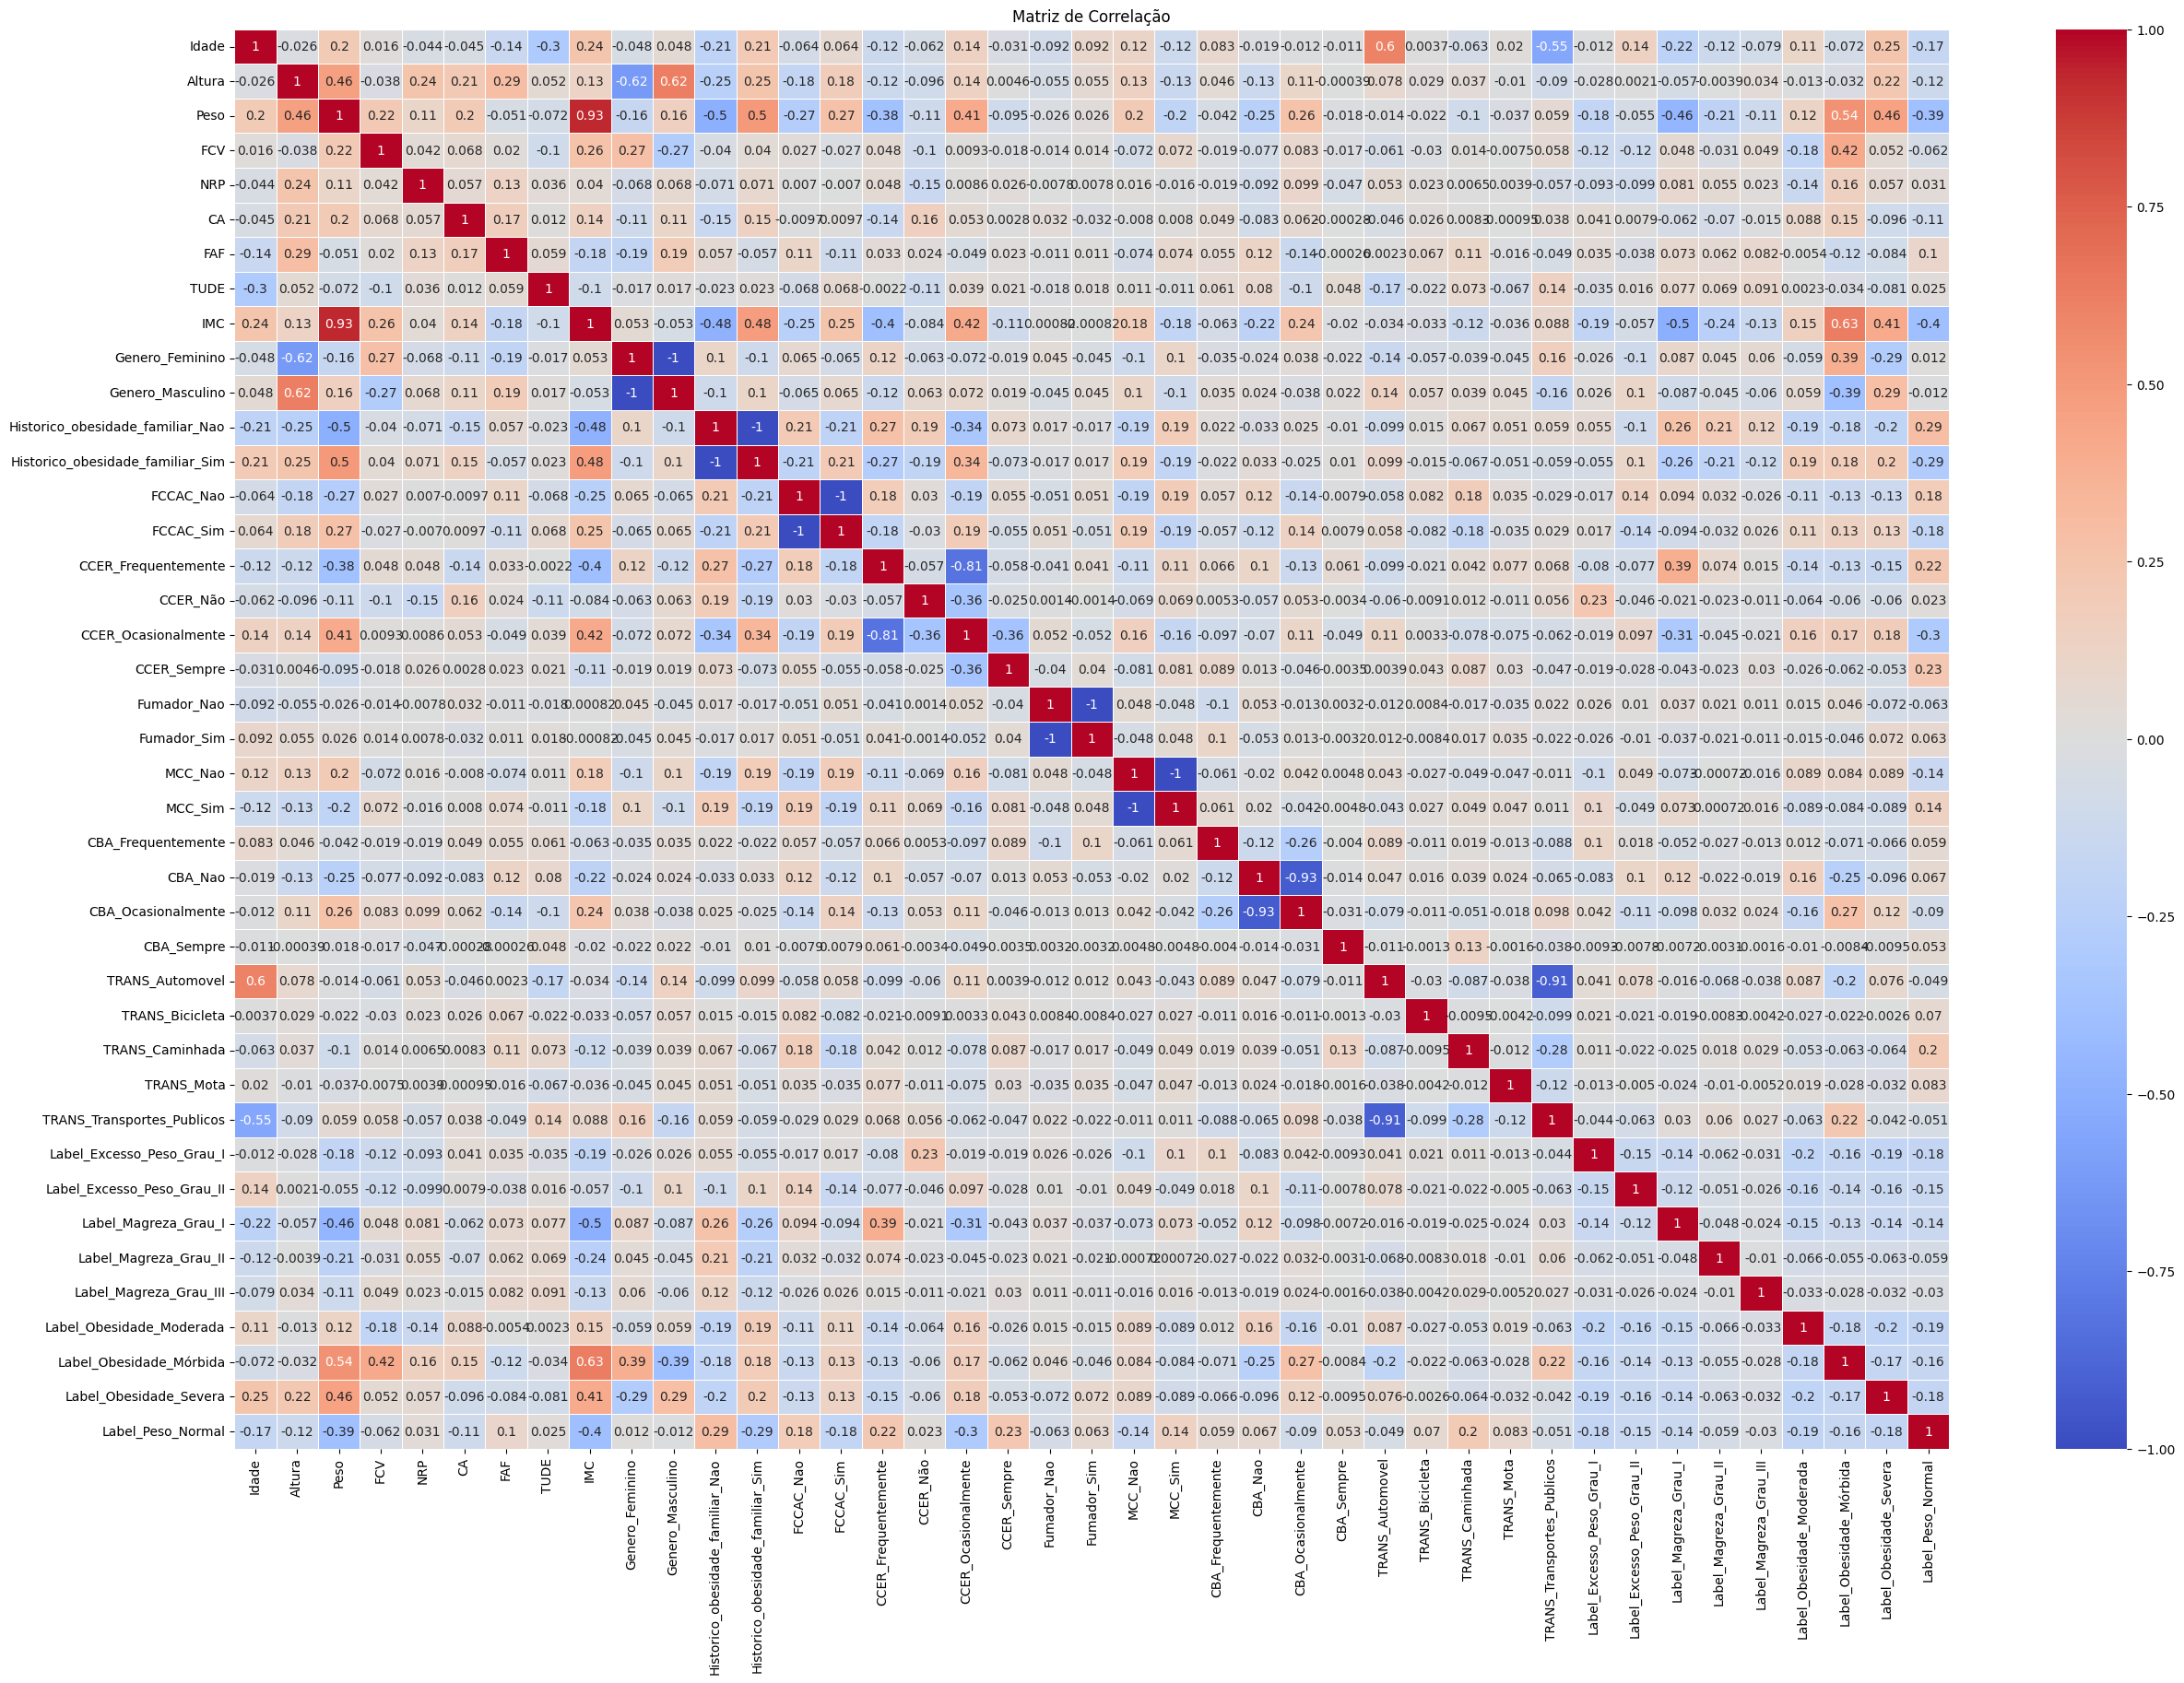

In [210]:
# Matriz de Correlação
corr_matrix = data_encoded.corr()

# Colorir e Plotar a Matriz de Correção
plt.figure(figsize=(30, 20))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Matriz de Correlação")
plt.show()

4. Realize o pré-processamento dos dados:

  ##### a) Faça a identificação de NA e limpe o dataset, se aplicável 


In [211]:
# Identificar valores Inválidos
missing_values = data.isna().sum()
print("Valores ausentes por coluna:\n", missing_values)

Valores ausentes por coluna:
 Genero                          0
Idade                           0
Altura                          0
Peso                            0
Historico_obesidade_familiar    0
FCCAC                           0
FCV                             0
NRP                             0
CCER                            0
Fumador                         0
CA                              0
MCC                             0
FAF                             0
TUDE                            0
CBA                             0
TRANS                           0
Label                           0
IMC                             0
dtype: int64


Como é possível observar, nenhuma das colunas contém valores inválidos, no entanto caso quiséssemos limpar o dataset:

In [212]:
# Limpar o dataset
data_cleaned = data.dropna()

##### b) Identifique dados inconsistentes e outliers, se aplicável

In [213]:
# Identificação dos tipos de dados
print("\nTipos de Dados::\n", data_cleaned.dtypes)

# Validação de Dados
print("\nValidação dos valores dos Dados:")
print("Dados de Idade Inválidos:\n", data_cleaned[data_cleaned['Idade'] < 0])
print("Dados de Altura Inválidos:\n", data_cleaned[(data_cleaned['Altura'] <= 0) | (data_cleaned['Altura'] > 2.72)])
print("Dados de Peso Inválidos:\n", data_cleaned[(data_cleaned['Peso'] <= 0) | (data_cleaned['Peso'] > 300)])



Tipos de Dados::
 Genero                           object
Idade                           float64
Altura                          float64
Peso                            float64
Historico_obesidade_familiar     object
FCCAC                            object
FCV                             float64
NRP                             float64
CCER                             object
Fumador                          object
CA                              float64
MCC                              object
FAF                             float64
TUDE                            float64
CBA                              object
TRANS                            object
Label                            object
IMC                             float64
dtype: object

Validação dos valores dos Dados:
Dados de Idade Inválidos:
 Empty DataFrame
Columns: [Genero, Idade, Altura, Peso, Historico_obesidade_familiar, FCCAC, FCV, NRP, CCER, Fumador, CA, MCC, FAF, TUDE, CBA, TRANS, Label, IMC]
Index: []
Dados de Altura

{'whiskers': [<matplotlib.lines.Line2D at 0x2941c050ad0>,
 'caps': [<matplotlib.lines.Line2D at 0x2942a9c7910>,
 'boxes': [<matplotlib.lines.Line2D at 0x2941c123c90>],
 'medians': [<matplotlib.lines.Line2D at 0x2941c09e690>],
 'fliers': [<matplotlib.lines.Line2D at 0x2941c09ee50>],
 'means': []}

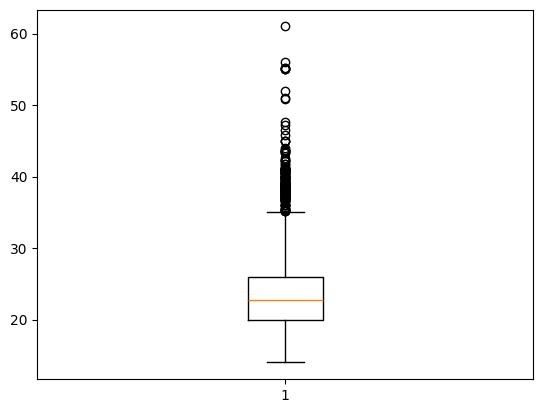

In [214]:
#Visualizar os outliers graficamente
plt.boxplot(data = data_cleaned, x = 'Idade')


{'whiskers': [<matplotlib.lines.Line2D at 0x2941c0f0210>,
 'caps': [<matplotlib.lines.Line2D at 0x2941c0f1510>,
 'boxes': [<matplotlib.lines.Line2D at 0x29412a48050>],
 'medians': [<matplotlib.lines.Line2D at 0x2941c0f25d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2941c0f2e10>],
 'means': []}

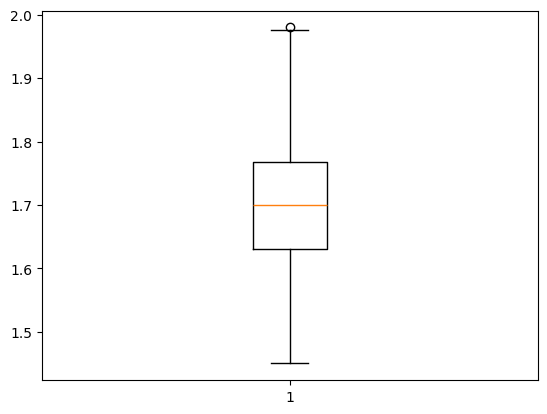

In [215]:
plt.boxplot(data = data_cleaned, x = 'Altura')

{'whiskers': [<matplotlib.lines.Line2D at 0x2941c14b450>,
 'caps': [<matplotlib.lines.Line2D at 0x2941c15c7d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2941c14ab90>],
 'medians': [<matplotlib.lines.Line2D at 0x2941c15d0d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2941c15d950>],
 'means': []}

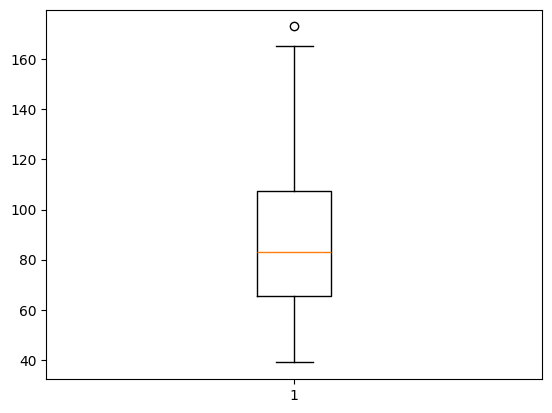

In [216]:
plt.boxplot(data = data_cleaned, x = 'Peso')

{'whiskers': [<matplotlib.lines.Line2D at 0x2941c1ab650>,
 'caps': [<matplotlib.lines.Line2D at 0x2941c1b8810>,
 'boxes': [<matplotlib.lines.Line2D at 0x2941c1aae10>],
 'medians': [<matplotlib.lines.Line2D at 0x2941c1b9990>],
 'fliers': [<matplotlib.lines.Line2D at 0x2941c1ba1d0>],
 'means': []}

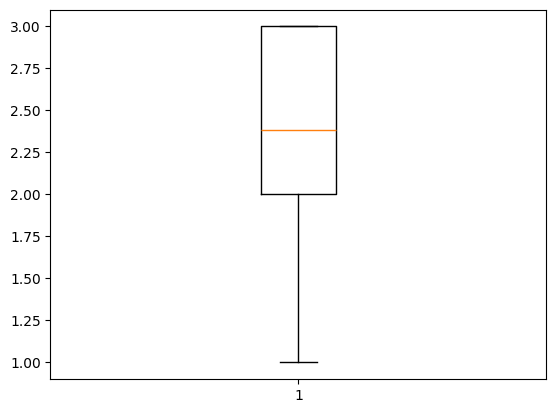

In [217]:
plt.boxplot(data = data_cleaned, x = 'FCV')

{'whiskers': [<matplotlib.lines.Line2D at 0x2941c213210>,
 'caps': [<matplotlib.lines.Line2D at 0x2941c2184d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2941c212a90>],
 'medians': [<matplotlib.lines.Line2D at 0x2941c219410>],
 'fliers': [<matplotlib.lines.Line2D at 0x2941c219bd0>],
 'means': []}

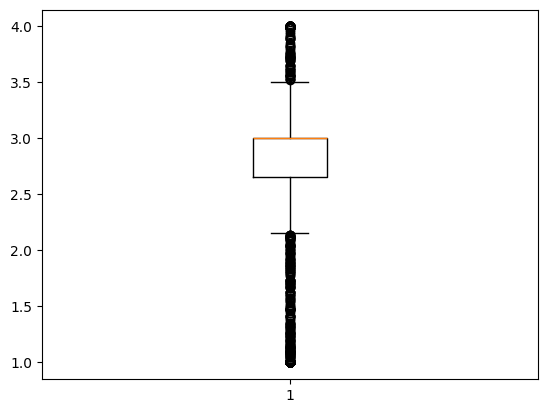

In [218]:
plt.boxplot(data = data_cleaned, x = 'NRP')

{'whiskers': [<matplotlib.lines.Line2D at 0x2941c276cd0>,
 'caps': [<matplotlib.lines.Line2D at 0x2941c277e90>,
 'boxes': [<matplotlib.lines.Line2D at 0x2941c276590>],
 'medians': [<matplotlib.lines.Line2D at 0x2941c288f50>],
 'fliers': [<matplotlib.lines.Line2D at 0x2941c2897d0>],
 'means': []}

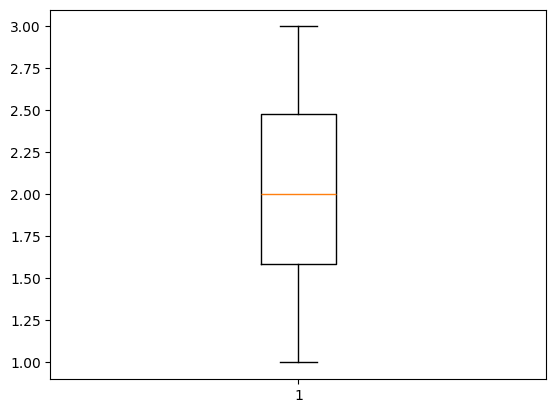

In [219]:
plt.boxplot(data = data_cleaned, x = 'CA')

{'whiskers': [<matplotlib.lines.Line2D at 0x2941c2df150>,
 'caps': [<matplotlib.lines.Line2D at 0x2941c2ec350>,
 'boxes': [<matplotlib.lines.Line2D at 0x2941c2de8d0>],
 'medians': [<matplotlib.lines.Line2D at 0x2941c2ed1d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2941c2eda10>],
 'means': []}

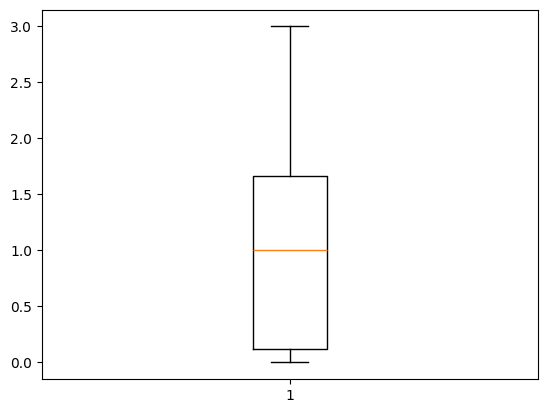

In [220]:
plt.boxplot(data = data_cleaned, x = 'FAF')

{'whiskers': [<matplotlib.lines.Line2D at 0x2941c33ea50>,
 'caps': [<matplotlib.lines.Line2D at 0x2941c33fd90>,
 'boxes': [<matplotlib.lines.Line2D at 0x2941c33e210>],
 'medians': [<matplotlib.lines.Line2D at 0x2941c34cf50>],
 'fliers': [<matplotlib.lines.Line2D at 0x2941c34d790>],
 'means': []}

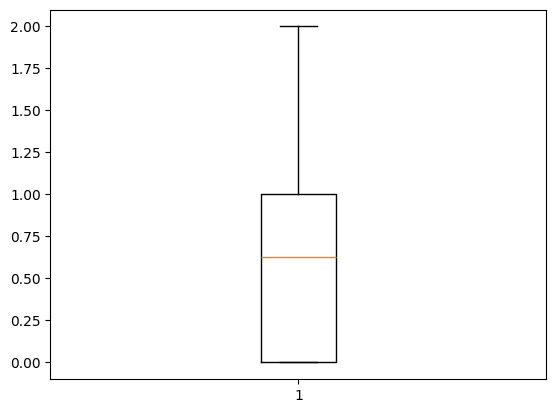

In [221]:
plt.boxplot(data = data_cleaned, x = 'TUDE')

{'whiskers': [<matplotlib.lines.Line2D at 0x2941c3b8590>,
 'caps': [<matplotlib.lines.Line2D at 0x2941c3b9a50>,
 'boxes': [<matplotlib.lines.Line2D at 0x2941c3abbd0>],
 'medians': [<matplotlib.lines.Line2D at 0x2941c3baf50>],
 'fliers': [<matplotlib.lines.Line2D at 0x2941c3bba10>],
 'means': []}

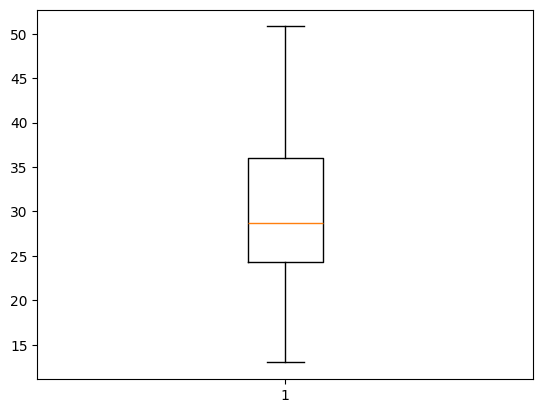

In [222]:
plt.boxplot(data = data_cleaned, x = 'IMC')

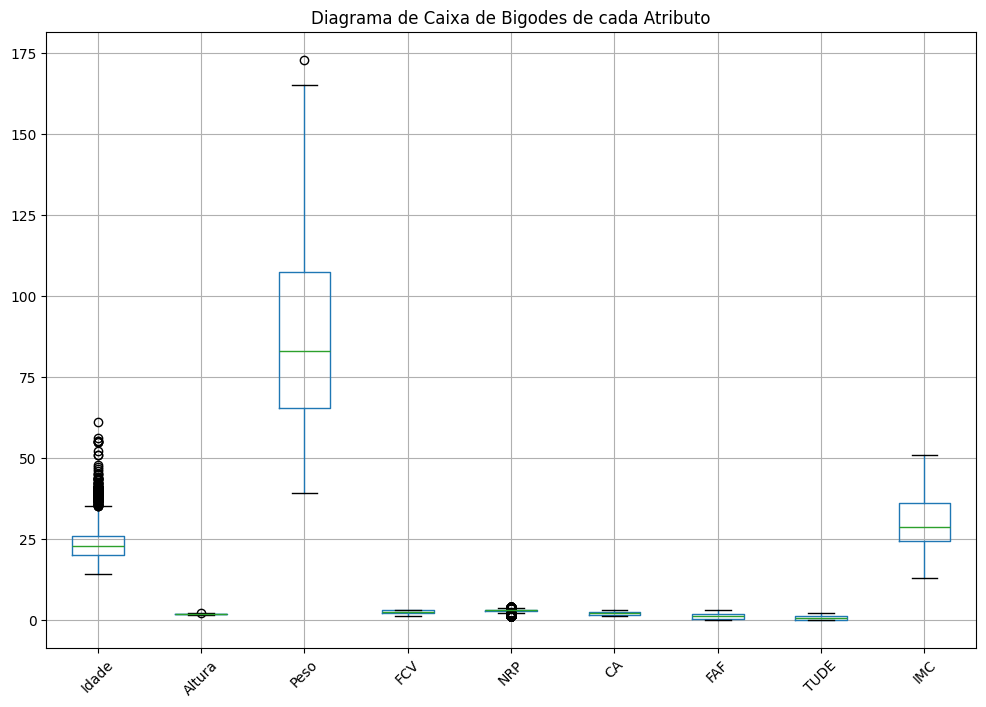

In [223]:
# Visualizar os diagramas de caixas de bigodes no mesmo gráfico para comparar os outliers entre atributos
plt.figure(figsize=(12, 8))
data_cleaned.boxplot()
plt.xticks(rotation=45)
plt.title("Diagrama de Caixa de Bigodes de cada Atributo")
plt.show()

Como é possível observar pelo gráfico, os atributos com outliers são a Idade, Altura, Peso e o NRP. 
A escolha da biblioteca matplotlib.pyplot para criar os boxplots para a verificação dos outliers, deve-se a uma maior facilidade de leitura ao invés da biblioteca seaborn, como é o caso dos diagramas apresentados na alínea 3.

In [224]:
# Identificação de Outliers através do Método IQR
def identify_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

#Chamada da função para Identificar Outliers de cada Atributo
outliers_idade = identify_outliers_iqr(data_cleaned, 'Idade')
outliers_altura = identify_outliers_iqr(data_cleaned, 'Altura')
outliers_peso = identify_outliers_iqr(data_cleaned, 'Peso')
outliers_imc = identify_outliers_iqr(data_cleaned, 'IMC')
outliers_fcv = identify_outliers_iqr(data_cleaned, 'FCV')
outliers_nrp = identify_outliers_iqr(data_cleaned, 'NRP')
outliers_ca = identify_outliers_iqr(data_cleaned, 'CA')
outliers_faf = identify_outliers_iqr(data_cleaned, "FAF")
outliers_tude = identify_outliers_iqr(data_cleaned, "TUDE")

# Apresentação das Entradas com Dados considerados Outliers
print("\nOutliers Idade:\n", outliers_idade)
print("\nOutliers Altura:\n", outliers_altura)
print("\nOutliers Peso:\n", outliers_peso)
print("\nOutliers IMC:\n", outliers_imc)
print("\nOutliers FCV:\n", outliers_fcv)
print("\nOutliers NRP:\n", outliers_nrp)
print("\nOutliers CA:\n", outliers_ca)
print("\nOutliers FAF:\n", outliers_faf)
print("\nOutliers TUDE:\n", outliers_tude)


Outliers Idade:
          Genero      Idade    Altura        Peso Historico_obesidade_familiar  \
13    Masculino  41.000000  1.800000   99.000000                          Nao   
21     Feminino  52.000000  1.690000   87.000000                          Sim   
33    Masculino  39.000000  1.790000   90.000000                          Nao   
92    Masculino  55.000000  1.780000   84.000000                          Sim   
104    Feminino  38.000000  1.560000   80.000000                          Sim   
...         ...        ...       ...         ...                          ...   
1740  Masculino  37.765356  1.763582  117.861590                          Sim   
1775  Masculino  37.207082  1.762921  118.401740                          Sim   
1776  Masculino  38.108940  1.752863  119.201465                          Sim   
1777  Masculino  38.644441  1.768235  117.792268                          Sim   
1778  Masculino  38.112989  1.766888  118.134898                          Sim   

     FCCA

In [225]:
# Identificação dos Outliers através do Método Z-Score
def identify_outliers_zscore(df, column, threshold=3):
    mean = df[column].mean()
    std = df[column].std()
    z_scores = (df[column] - mean) / std
    outliers = df[np.abs(z_scores) > threshold]
    return outliers

#Chamada da função para Identificar Outliers de cada Atributo
outliers_idade_z = identify_outliers_zscore(data_cleaned, 'Idade')
outliers_altura_z = identify_outliers_zscore(data_cleaned, 'Altura')
outliers_peso_z = identify_outliers_zscore(data_cleaned, 'Peso')
outliers_imc_z = identify_outliers_zscore(data_cleaned, 'IMC')
outliers_fcv_z = identify_outliers_zscore(data_cleaned, 'FCV')
outliers_nrp_z = identify_outliers_zscore(data_cleaned, 'NRP')
outliers_ca_z = identify_outliers_zscore(data_cleaned, 'CA')
outliers_faf_z = identify_outliers_zscore(data_cleaned, "FAF")
outliers_tude_z = identify_outliers_zscore(data_cleaned, "TUDE")

# Apresentação das Entradas com Dados considerados Outliers
print("\nOutliers Idade:\n", outliers_idade_z)
print("\nOutliers Altura:\n", outliers_altura_z)
print("\nOutliers Peso:\n", outliers_peso_z)
print("\nOutliers IMC:\n", outliers_imc_z)
print("\nOutliers FCV:\n", outliers_fcv_z)
print("\nOutliers NRP:\n", outliers_nrp_z)
print("\nOutliers CA:\n", outliers_ca_z)
print("\nOutliers FAF:\n", outliers_faf_z)
print("\nOutliers TUDE:\n", outliers_tude_z)


Outliers Idade:
          Genero      Idade    Altura       Peso Historico_obesidade_familiar  \
21     Feminino  52.000000  1.690000  87.000000                          Sim   
92    Masculino  55.000000  1.780000  84.000000                          Sim   
133    Feminino  61.000000  1.650000  66.000000                          Nao   
137   Masculino  44.000000  1.600000  80.000000                          Sim   
161   Masculino  55.000000  1.650000  80.000000                          Nao   
169    Feminino  45.000000  1.630000  77.000000                          Sim   
232    Feminino  51.000000  1.590000  50.000000                          Sim   
252   Masculino  56.000000  1.790000  90.000000                          Sim   
492   Masculino  45.000000  1.700000  86.000000                          Nao   
1013  Masculino  55.246250  1.769269  80.491339                          Nao   
1034  Masculino  50.832559  1.745528  82.130728                          Sim   
1063   Feminino  45.00

##### c) Implemente a seleção de atributos, se aplicável 


In [226]:
# Transformar variáveis categóricas em variáveis numéricas usando o dataset limpo
data_encoded = pd.get_dummies(data_cleaned)

#Dados de Treino
X = data_encoded.drop(columns=['IMC'])
#Dados Esperados
y = data_encoded['IMC']

#Definição do Teste
test = SelectKBest(score_func=f_regression, k=5)

#Correr a função de score
kbest = test.fit(X, y)

#Definir apresentação dos scores com 3 casas decimais
np.set_printoptions(precision=3)

#Apresentar scores obtidos pelo teste
print("Scores:", kbest.scores_)

# Criar uma máscara dos atributos selecionados
selected_features_mask = kbest.get_support()

# Retirar a lista dos indices dos atributos escolhidos pelo teste
selected_feature_indices = np.where(selected_features_mask)[0]
print("\nIndices dos atributos escolhidos:", selected_feature_indices)

# Transformar o dataset para apenas conter os atributos selecionados pelo teste
features = kbest.transform(X)

# Apresentar os dados escolhidos pelo teste
print("Atributos transformados (primeiras 5 amostras):")
print(features[0:5,:])
print("\n")
print(X.columns[selected_feature_indices])

Scores: [1.337e+02 3.727e+01 1.461e+04 1.576e+02 3.375e+00 4.479e+01 6.864e+01
 2.118e+01 5.949e+00 5.949e+00 6.435e+02 6.435e+02 1.360e+02 1.360e+02
 3.906e+02 1.497e+01 4.531e+02 2.475e+01 1.415e-03 1.415e-03 7.414e+01
 7.414e+01 8.369e+00 1.041e+02 1.239e+02 8.100e-01 2.383e+00 2.248e+00
 3.318e+01 2.673e+00 1.654e+01 7.829e+01 6.931e+00 6.921e+02 1.257e+02
 3.805e+01 4.812e+01 1.363e+03 4.330e+02 3.950e+02]

Indices dos atributos escolhidos: [ 2 10 11 33 37]
Atributos transformados (primeiras 5 amostras):
[[64.   0.   1.   0.   0. ]
 [56.   0.   1.   0.   0. ]
 [77.   0.   1.   0.   0. ]
 [87.   1.   0.   0.   0. ]
 [89.8  1.   0.   0.   0. ]]


Index(['Peso', 'Historico_obesidade_familiar_Nao',
       'Historico_obesidade_familiar_Sim', 'Label_Magreza_Grau_I',
       'Label_Obesidade_Mórbida'],
      dtype='object')


##### Outra solução possível seria utilizando o label encoder:

In [227]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Criar uma cópia do dataset para ser utilizada pelo LabelEncoder
df_encoded = data_cleaned.copy()

# Transformar os atributos categóricos com apenas 2 opções (como por ex: Genero Masculino ou Genero Feminino) em atributos categóricos
df_encoded['Genero'] = le.fit_transform(data_cleaned['Genero'])
df_encoded['Historico_obesidade_familiar'] = le.fit_transform(data_cleaned['Historico_obesidade_familiar'])
df_encoded['FCCAC'] = le.fit_transform(data_cleaned['FCCAC'])
df_encoded['Fumador'] = le.fit_transform(data_cleaned['Fumador'])
df_encoded['MCC'] = le.fit_transform(data_cleaned['MCC'])

# Transformar os restantes atributos com mais do que 2 opções (como por ex: TRANS Automovel ou TRANS Transportes Públicos) em atributos categóricos
df_dummies = df_encoded.copy()
df_dummies = df_dummies.drop(columns=['Genero', 'Historico_obesidade_familiar', 'FCCAC', 'Fumador', 'MCC'])
df_dummies = pd.get_dummies(df_dummies)

# Juntar ambos os datasets num só
df_encoded = pd.merge(df_encoded, df_dummies)
# Eliminar labels e atributos categóricos
df_encoded = df_encoded.drop(columns=['CCER','CBA','TRANS','Label','Label_Excesso_Peso_Grau_I','Label_Excesso_Peso_Grau_II','Label_Magreza_Grau_I','Label_Magreza_Grau_II','Label_Magreza_Grau_III','Label_Obesidade_Moderada','Label_Obesidade_Mórbida','Label_Obesidade_Severa','Label_Peso_Normal'])

# Dados de Treino
X = df_encoded.drop(columns=['IMC'])
# Dados Esperados
y = df_encoded['IMC']

# Definição do Teste
test = SelectKBest(score_func=f_regression, k=5)

# Correr a função de score
kbest = test.fit(X, y)

# Definir apresentação dos scores com 3 casas decimais
np.set_printoptions(precision=3)
print("Scores:", kbest.scores_)

# Criar uma máscara dos atributos selecionados
selected_features_mask = kbest.get_support()

# Retirar a lista dos indices dos atributos escolhidos pelo teste
selected_feature_indices = np.where(selected_features_mask)[0]
print("\nIndices dos atributos escolhidos", selected_feature_indices)

# Transformar o dataset para apenas conter os atributos selecionados pelo teste
features = kbest.transform(X)

# Apresentar os dados escolhidos pelo teste
print("\nAtributos transformados (primeiras 5 amostras):")
print(features[0:5, :])
selected_feature_names = X.columns[selected_feature_indices]
print("\nAtributos Escolhidos:", selected_feature_names)

Scores: [8.085e+00 1.781e+02 8.342e+01 1.656e+04 7.077e+02 1.400e+02 1.639e+02
 3.659e+01 1.264e-01 2.942e+01 6.823e+01 5.206e+01 4.434e+00 4.616e+02
 3.938e+01 5.227e+02 2.207e+01 6.171e+00 7.549e+01 8.869e+01 7.604e-01
 5.313e-02 1.944e+00 3.231e+01 2.234e+00 7.473e+00]

Indices dos atributos escolhidos [ 1  3  4 13 15]

Atributos transformados (primeiras 5 amostras):
[[21.  64.   1.   0.   1. ]
 [21.  56.   1.   0.   1. ]
 [23.  77.   1.   0.   1. ]
 [27.  87.   0.   0.   1. ]
 [22.  89.8  0.   0.   1. ]]

Atributos Escolhidos: Index(['Idade', 'Peso', 'Historico_obesidade_familiar', 'CCER_Frequentemente',
       'CCER_Ocasionalmente'],
      dtype='object')


Ou podemos ainda testar sem eliminar os atributos categóricos:

In [228]:
# Transformar os restantes atributos com mais do que 2 opções (como por ex: TRANS Automovel ou TRANS Transportes Públicos) em atributos categóricos
df_dummies = df_encoded.copy()
df_dummies = df_dummies.drop(columns=['Genero', 'Historico_obesidade_familiar', 'FCCAC', 'Fumador', 'MCC'])
df_dummies = pd.get_dummies(df_dummies)

# Juntar ambos os datasets num só
df_encoded = pd.merge(df_encoded, df_dummies)

# Dados de Treino
X = df_encoded.drop(columns=['IMC'])
# Dados Esperados
y = df_encoded['IMC']

# Definição do Teste
test = SelectKBest(score_func=f_regression, k=5)

# Correr a função de score
kbest = test.fit(X, y)

# Definir apresentação dos scores com 3 casas decimais
np.set_printoptions(precision=3)
print("Scores:", kbest.scores_)

# Criar uma máscara dos atributos selecionados
selected_features_mask = kbest.get_support()

# Retirar a lista dos indices dos atributos escolhidos pelo teste
selected_feature_indices = np.where(selected_features_mask)[0]
print("\nIndices dos atributos escolhidos", selected_feature_indices)

# Transformar o dataset para apenas conter os atributos selecionados pelo teste
features = kbest.transform(X)

# Apresentar os dados escolhidos pelo teste
print("\nAtributos transformados (primeiras 5 amostras):")
print(features[0:5, :])
selected_feature_names = X.columns[selected_feature_indices]
print("\nAtributos Escolhidos:", selected_feature_names)

Scores: [5.752e+03 5.201e+03 2.173e+04 5.277e+05 1.019e+04 6.461e+03 3.449e+03
 3.923e+03 9.027e+01 9.706e+03 2.777e+02 6.147e+03 1.024e+03 3.617e+04
 1.469e+03 8.754e+03 5.851e+01 2.435e+00 5.237e+00 6.700e+00 3.620e+00
 6.382e+02 3.019e+00 1.803e+02 1.594e+00 3.236e+02]

Indices dos atributos escolhidos [ 2  3  4  9 13]

Atributos transformados (primeiras 5 amostras):
[[ 1.62 64.    1.    2.    0.  ]
 [ 1.52 56.    1.    3.    0.  ]
 [ 1.8  77.    1.    2.    0.  ]
 [ 1.8  87.    0.    2.    0.  ]
 [ 1.78 89.8   0.    2.    0.  ]]

Atributos Escolhidos: Index(['Altura', 'Peso', 'Historico_obesidade_familiar', 'CA',
       'CCER_Frequentemente'],
      dtype='object')


De acordo com a matriz de correlações, o resultado do primeiro teste, ou seja, os atributos escolhidos, foram os mais próximos às correlações mais fortes da matriz de correlação, uma vez que utilizou-se apenas o get_dummies() em ambas, no entanto o resultado obtido pelo uso do LabelEncoder também parece estar certo.

Apesar disso é preciso ter cuidado ao usar o LabelEncoder, pois este não funciona tão corretamente quando se tratam de varíaveis categóricas que possam tomar mais que 2 valores, como é o caso do TRANS, CCER, CA, CB, etc. Nesses caso é melhor utilizar o get_dummies() para fazer a transformação dos dados.

##### d) Implemente a normalização dos dados, se necessário 


In [229]:
# Função de Normalização com Recurso a MiniMax
def normalize(y):
    y_norm = (y - np.min(y)) / (np.max(y) - np.min(y))
    return y_norm

# Selecionar apenas as colunas com atributos numéricos
numeric_columns = data_cleaned.select_dtypes(include=[np.number]).columns

# Aplicar a normalização
data_norm = data_cleaned.copy()
data_norm[numeric_columns] = data_cleaned[numeric_columns].apply(normalize)

#Apresentar dados normalizados
print(data_norm.describe())



             Idade       Altura         Peso          FCV          NRP  \
count  2111.000000  2111.000000  2111.000000  2111.000000  2111.000000   
mean      0.219417     0.474863     0.355120     0.709522     0.561876   
std       0.135021     0.176047     0.195457     0.266963     0.259346   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.126536     0.339623     0.197562     0.500000     0.552913   
50%       0.186764     0.472640     0.328358     0.692751     0.666667   
75%       0.255319     0.600875     0.510677     1.000000     0.666667   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

                CA          FAF         TUDE          IMC  
count  2111.000000  2111.000000  2111.000000  2111.000000  
mean      0.504006     0.336766     0.328933     0.441685  
std       0.306477     0.283531     0.304464     0.211867  
min       0.000000     0.000000     0.000000     0.000000  
25%       0.292406     0.041502  

5. Crie um diagrama de correlação entre todos os atributos e comente o que observa. 


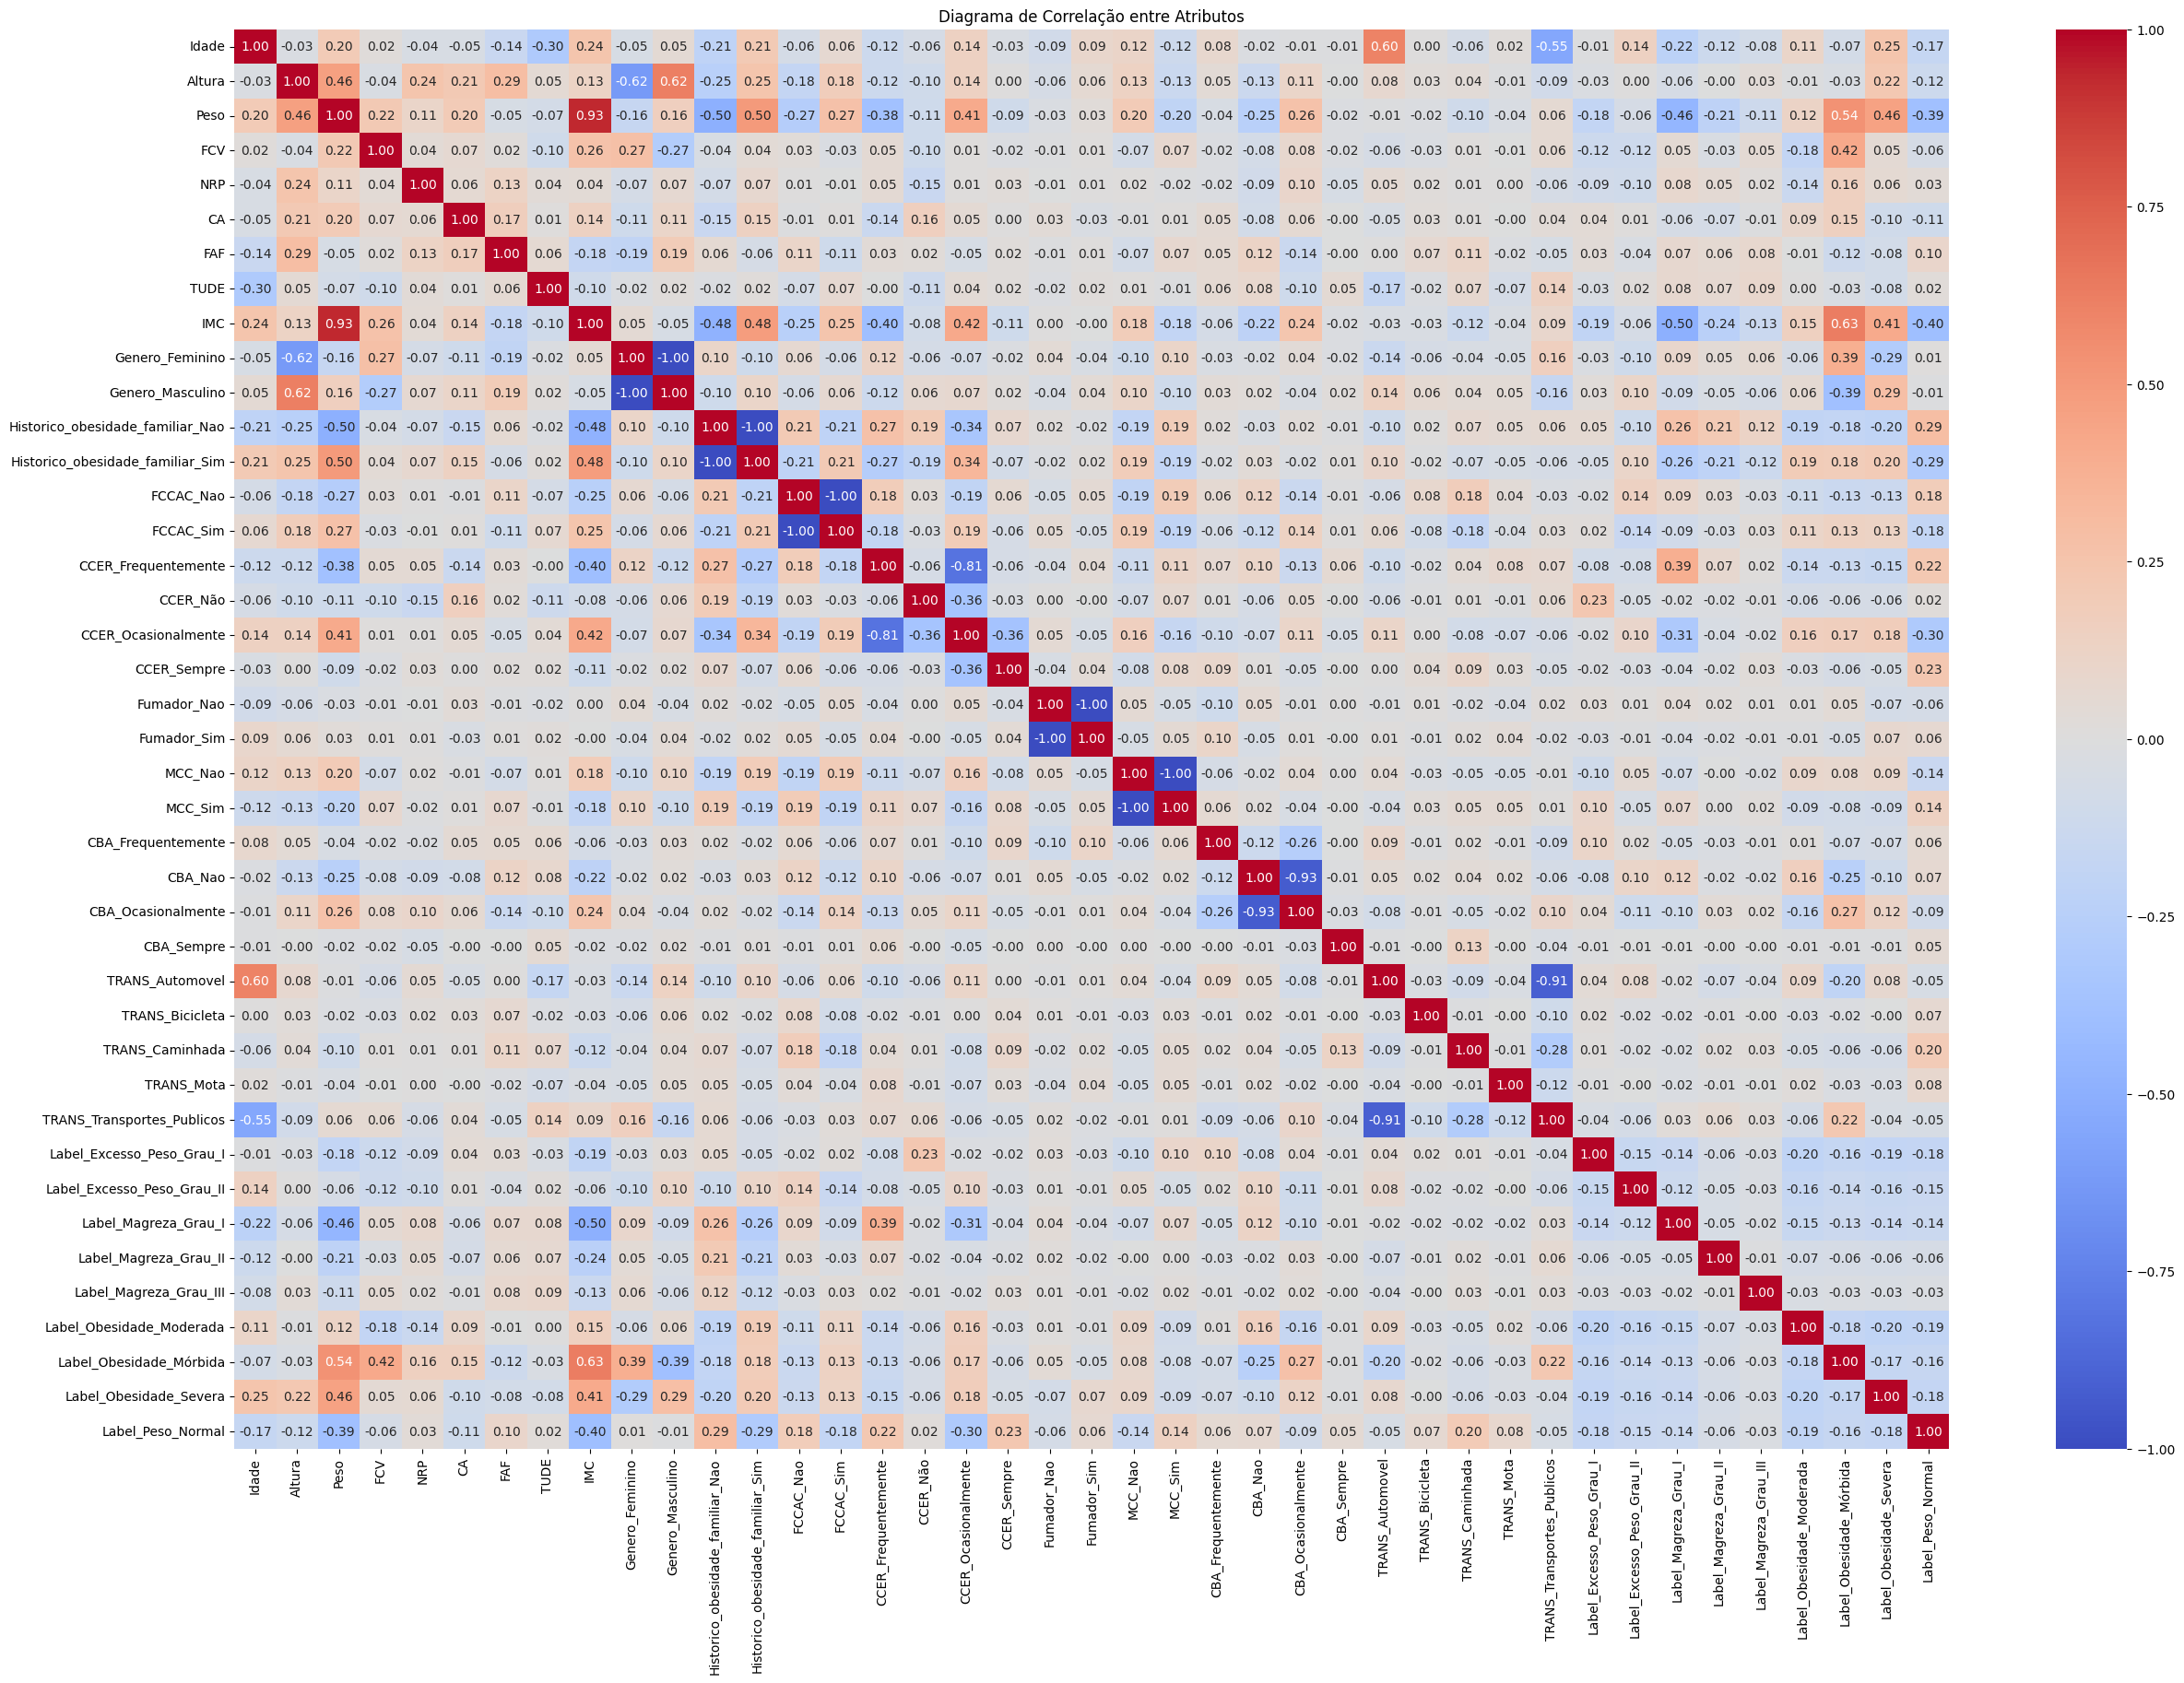

In [230]:
# Calcular a matriz de correlação
correlation_matrix = data_encoded.corr()

# Plotar a matriz de correlação
plt.figure(figsize=(30, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Diagrama de Correlação entre Atributos")
plt.show()

Como é possível observar na matriz de correlação, os atributos que mais estão correlacionados são:

> IMC e Peso

Correlação: 0.93

Como o IMC = Peso / Altura^2, esta correlação forte faz sentido.

> TRANS_Automovel e TRANS_Transportes_Publicos

Correlação: -0.91

Esta correlação forte faz sentido porque a maioria das pessoas que utilizam automóvel como seu transporte diário, não fazem uso de transportes públicos.

> CBA_Nao e CBA_Ocasionalmente

Correlação: -0.93

Não é possível determinar porque existe uma correlação tão forte entre individuos que não consomem alcool com individuos que consomem alcool ocasionalmente.

> CCER_Frequentemente e CCER_Ocasionalmente

Correlação: -0.81

Não é possível determinar porque existe uma correlação tão forte entre individuos que consomem comida entre refeições frequentemente e individuos que consomem comida entre refeições ocasionalmente.

> Label_Obesidade_Mórbida e IMC

Correlação: 0.63

Esta correlação forte faz sentido por o IMC estar diretamente ligado às labels relativas ao peso dos individuos.

> Altura e Genero Masculino

Correlação: 0.62

Existe uma correlção positiva entre a altura e o genero masculino, pois está cientificamente comprovado que os homens são maiores que as mulheres, como é possível ler no seguinte artigo criado publicado pelo MIT : https://news.mit.edu/2019/genetic-study-takes-sex-differences-research-to-new-heights-0718.

> Altura e Genero Feminino

Correlação: -0.62

Existe uma correlação negativa entre a altura e o genero feminino, pois tal como foi referido anteriormente as mulheres são menores que os homens, como é possível ler no seguinte artigo criado publicado pelo MIT: https://news.mit.edu/2019/genetic-study-takes-sex-differences-research-to-new-heights-0718.

> Trans_Automovel e Idade

Correlação: 0.60

Existe um estudo : https://www.ncbi.nlm.nih.gov/pmc/articles/PMC9915393/ que comprova que pessoas mais idosas, são mais prováveis de utilizar o carro como um meio de transporte, seja como condutor ou como passageiro.




6. Obtenha um modelo de regressão linear simples para a variável “IMC” usando o
atributo relativo à “Idade” de cada registo: 


#### a) Apresente a função linear resultante. 

#### b) Visualize a reta correspondente ao modelo de regressão linear simples e o respetivo diagrama de dispersão.

X_train size:  (1688, 1)
y_train size:  (1688,)

X_test size:  (423, 1)
y_test size:  (423,)
Função linear resultante: IMC = 22.12 + 0.31 * Idade


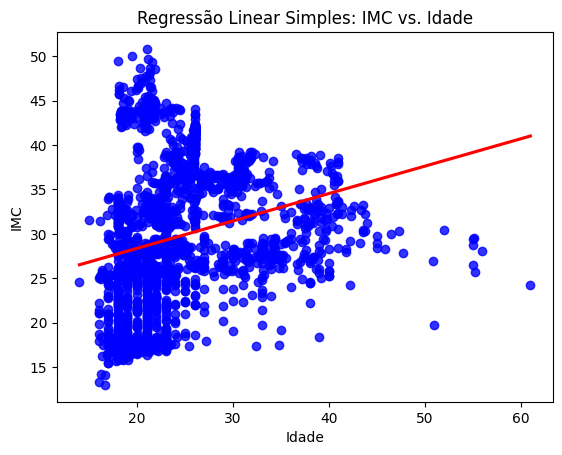

In [231]:
# Carregar o ficheiro
file_path = 'Dados_Trabalho_TP2.csv'
data = pd.read_csv(file_path)

# Remover a coluna 'Unnamed: 0' dos dados
data_cleaned = data.drop(columns=['Unnamed: 0'])

data_cleaned['IMC'] = data_cleaned['Peso'] / (data_cleaned['Altura'] ** 2)

X = data_cleaned[['Idade']].to_numpy()
y = data_cleaned.IMC

#Quantidade de dados

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state= 100)

print("X_train size: ", X_train.shape)
print("y_train size: ", y_train.shape)
print("\nX_test size: ", X_test.shape)
print("y_test size: ", y_test.shape)

#criar e ajustar o modelo de regressão linear:
model = LinearRegression()
model.fit(X_train, y_train)

#obter coeficientes

intercept = model.intercept_
slope = model.coef_[0]

#Equação da reta
print(f"Função linear resultante: IMC = {intercept:.2f} + {slope:.2f} * Idade")

sns.regplot(x='Idade', y='IMC', data=data_cleaned, order=1, ci=None, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
plt.title('Regressão Linear Simples: IMC vs. Idade')
plt.xlabel('Idade')
plt.ylabel('IMC')
plt.show()


#### c) Calcule o erro médio absoluto (MAE) e raiz quadrada do erro médio (RMSE) do modelo sobre os 20% casos de teste.

In [232]:
# Carregar o ficheiro
file_path = 'Dados_Trabalho_TP2.csv'
data = pd.read_csv(file_path)

# Remover a coluna 'Unnamed: 0' dos dados
data_cleaned = data.drop(columns=['Unnamed: 0'])

data_cleaned['IMC'] = data_cleaned['Peso'] / (data_cleaned['Altura'] ** 2)

X = data_cleaned[['Idade']].to_numpy()
y = data_cleaned.IMC

#Quantidade de dados

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state= 100)

print("X_train size: ", X_train.shape)
print("y_train size: ", y_train.shape)
print("\nX_test size: ", X_test.shape)
print("y_test size: ", y_test.shape)

#criar e ajustar o modelo de regressão linear:
model = LinearRegression()
model.fit(X_train, y_train)

#Avaliar o modelo
y_pred = model.predict(X_test)

#Efetuar os cálculos para o MAE
import numpy as np
MAE = np.mean(abs(y_test - y_pred))
print("MAE no set de treino: {:.3f}".format(MAE))

#Efetuar cáculos para o Mean Squared Error
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("RMSE: {:.3f}".format(rmse))


X_train size:  (1688, 1)
y_train size:  (1688,)

X_test size:  (423, 1)
y_test size:  (423,)
MAE no set de treino: 6.381
RMSE: 7.776


c:\Python311\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


#### d) Teste se é possível obter um modelo de regressão linear simples com melhor resultado, utilizando outra variável dos preditores disponíveis no dataset. 


In [233]:
# Carregar o ficheiro novamente
file_path = 'Dados_Trabalho_TP2.csv'
data = pd.read_csv(file_path)

# Remover a coluna 'Unnamed: 0' dos dados
data_cleaned = data.drop(columns=['Unnamed: 0'])

# Adicionar coluna de IMC
data_cleaned['IMC'] = data_cleaned['Peso'] / (data_cleaned['Altura'] ** 2)

# Testar diferentes variáveis preditoras (o peso apenas servirá para demonstrar que o valor dos preditores seriam muito melhores)
variaveis = ['Peso', 'Idade', 'FAF', 'CA']
resultados = {}

for var in variaveis:
    X = data_cleaned[[var]].to_numpy()
    y = data_cleaned.IMC

    # Separar os dados em treino e teste
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=100)

    # Criar e ajustar o modelo de regressão linear
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    intercept = model.intercept_
    slope = model.coef_[0]

    #Equação da reta
    print(f"Função linear resultante: IMC = {intercept:.2f} + {slope:.2f} * ", [var])

    # Avaliar o modelo
    y_pred = model.predict(X_test)

    # Calcular MAE e RMSE
    mae = mean_absolute_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    
    resultados[var] = {'MAE': mae, 'RMSE': rmse}
    
resultados

Função linear resultante: IMC = 4.91 + 0.29 *  ['Peso']
Função linear resultante: IMC = 22.12 + 0.31 *  ['Idade']
Função linear resultante: IMC = 31.25 + -1.65 *  ['FAF']
Função linear resultante: IMC = 25.54 + 2.01 *  ['CA']


c:\Python311\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.wa

{'Peso': {'MAE': 2.405247283457411, 'RMSE': 2.989071839114051},
 'Idade': {'MAE': 6.3808543358510965, 'RMSE': 7.775537583137655},
 'FAF': {'MAE': 6.493420807153639, 'RMSE': 7.872920501995279},
 'CA': {'MAE': 6.555815075152118, 'RMSE': 7.975215425636687}}

7. Tendo em conta o conjunto de dados apresentado, pretende-se prever o atributo IMC, aplicando os seguintes modelos (para os modelos sugeridos, o conjunto de atributos a utilizar pode variar)

##### a) Regressão linear múltipla.

In [234]:
#3 atributos mais correlacionados (Peso (0.93), FCV (0.26), Idade (0.24))
X = data_norm[['Peso','FCV','Idade']].to_numpy()
y = data_norm['IMC'].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

#Ajustar o modelo de regressão linear múltipla
mlr = LinearRegression()
mlr.fit(X_train, y_train)

#Interceção e Coeficientes
print("Intercept: ",round(mlr.intercept_,4))
print("Coefficients:")
coefficients = [round(coef, 4) for coef in mlr.coef_]
print(list(zip(['Peso','FCV','Idade'], coefficients)))

# Equação de regressão: IMC= 0.0405 + (0.9825 Peso) + (0.0475 FCV) + (0.0828 Idade)

# Previsão do test set
y_pred_mlr1= mlr.predict(X_test)
#print("Previsão para o test set: {}".format(y_pred_mlr))


# Valor real e valor previsto
mlr_diff = pd.DataFrame({'Actual value':y_test, 'Predicted value mlr1': y_pred_mlr1})
mlr_diff.head()

Intercept:  0.0405
Coefficients:
[('Peso', 0.9825), ('FCV', 0.0475), ('Idade', 0.0828)]


Actual value  Predicted value mlr1
0      0.324503              0.271671
1      0.918202              0.957268
2      0.737101              0.649629
3      0.427048              0.494667
4      0.525597              0.410710

In [235]:
#3 atributos menos correlacionados (NRP (0.04), Altura (0.13), CA (0.14))
X = data_norm[['NRP','Altura','CA']].to_numpy()
y = data_norm['IMC'].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

#Ajustar o modelo de regressão linear múltipla
mlr = LinearRegression()
mlr.fit(X_train, y_train)

#Interceção e Coeficientes
print("Intercept: ",round(mlr.intercept_,4))
print("Coefficients:")
coefficients = [round(coef, 4) for coef in mlr.coef_]
print(list(zip(['NRP','Altura','CA'], coefficients)))

# Equação de regressão: IMC= 0.03255 + (0.0039 NRP) + (0.144 Altura) + (0.0923 CA)

# Previsão do test set
y_pred_mlr2= mlr.predict(X_test)
#print("Previsão para o test set: {}".format(y_pred_mlr))


# Valor real e valor previsto
mlr_diff = pd.DataFrame({'Actual value':y_test, 'Predicted value mlr2': y_pred_mlr2})
mlr_diff.head()

Intercept:  0.3255
Coefficients:
[('NRP', 0.0039), ('Altura', 0.144), ('CA', 0.0923)]


Actual value  Predicted value mlr2
0      0.324503              0.413463
1      0.918202              0.490597
2      0.737101              0.461401
3      0.427048              0.496955
4      0.525597              0.401552

Foram feitas 2 dias previsões utilizando o modelo de regressão Linear Múltipla, um com os atributos mais correlacionados com o IMC e outro com os dados menos correlacionados com o IMC
É possivel observar que a previsão com os dados mais correlacionados não obtém uma grande discrepância entre os valores previstos e o atual, sendo assim possivel concluir que Peso, Idade e FCV (Frequência Consumo de Vegetais) são os valores mais indicados para prever o valor do IMC

In [236]:
#3 atributos com maiores coeficientes e que obtém as previsões mais corretas
X = data_norm[['Peso','Altura','CA']].to_numpy()
y = data_norm['IMC'].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

#Ajustar o modelo de regressão linear múltipla
mlr = LinearRegression()
mlr.fit(X_train, y_train)

#Interceção e Coeficientes
print("Intercept: ",round(mlr.intercept_,4))
print("Coefficients:")
coefficients = [round(coef, 4) for coef in mlr.coef_]
print(list(zip(['Peso','Altura','CA'], coefficients)))

# Equação de regressão: IMC= 0.02302 + (1.2028 Peso) - (0.4586 Altura) + (0.0033 CA)

# Previsão do test set
y_pred_mlr3= mlr.predict(X_test)
#print("Previsão para o test set: {}".format(y_pred_mlr))


# Valor real e valor previsto
mlr_diff = pd.DataFrame({'Actual value':y_test, 'Predicted value mlr3': y_pred_mlr3})
mlr_diff.head()

Intercept:  0.2302
Coefficients:
[('Peso', 1.2028), ('Altura', -0.4586), ('CA', 0.0033)]


Actual value  Predicted value mlr3
0      0.324503              0.332099
1      0.918202              0.972398
2      0.737101              0.713215
3      0.427048              0.429343
4      0.525597              0.504672

Para efeitos de teste, analisou-se das duas tentativas quais os coeficientes mais elevados dos 6 atributos escolhidos, sendo eles Peso, Altura e CA (Consumo Água) sendo que a partir destes se obteve previsões mais eficientes, ou seja, os valores previstos não apresentam grande diferença dos valores atuais

##### b) Árvore de regressão, usando a função DecisionTreeRegressor. Apresente a árvore de regressão obtida.

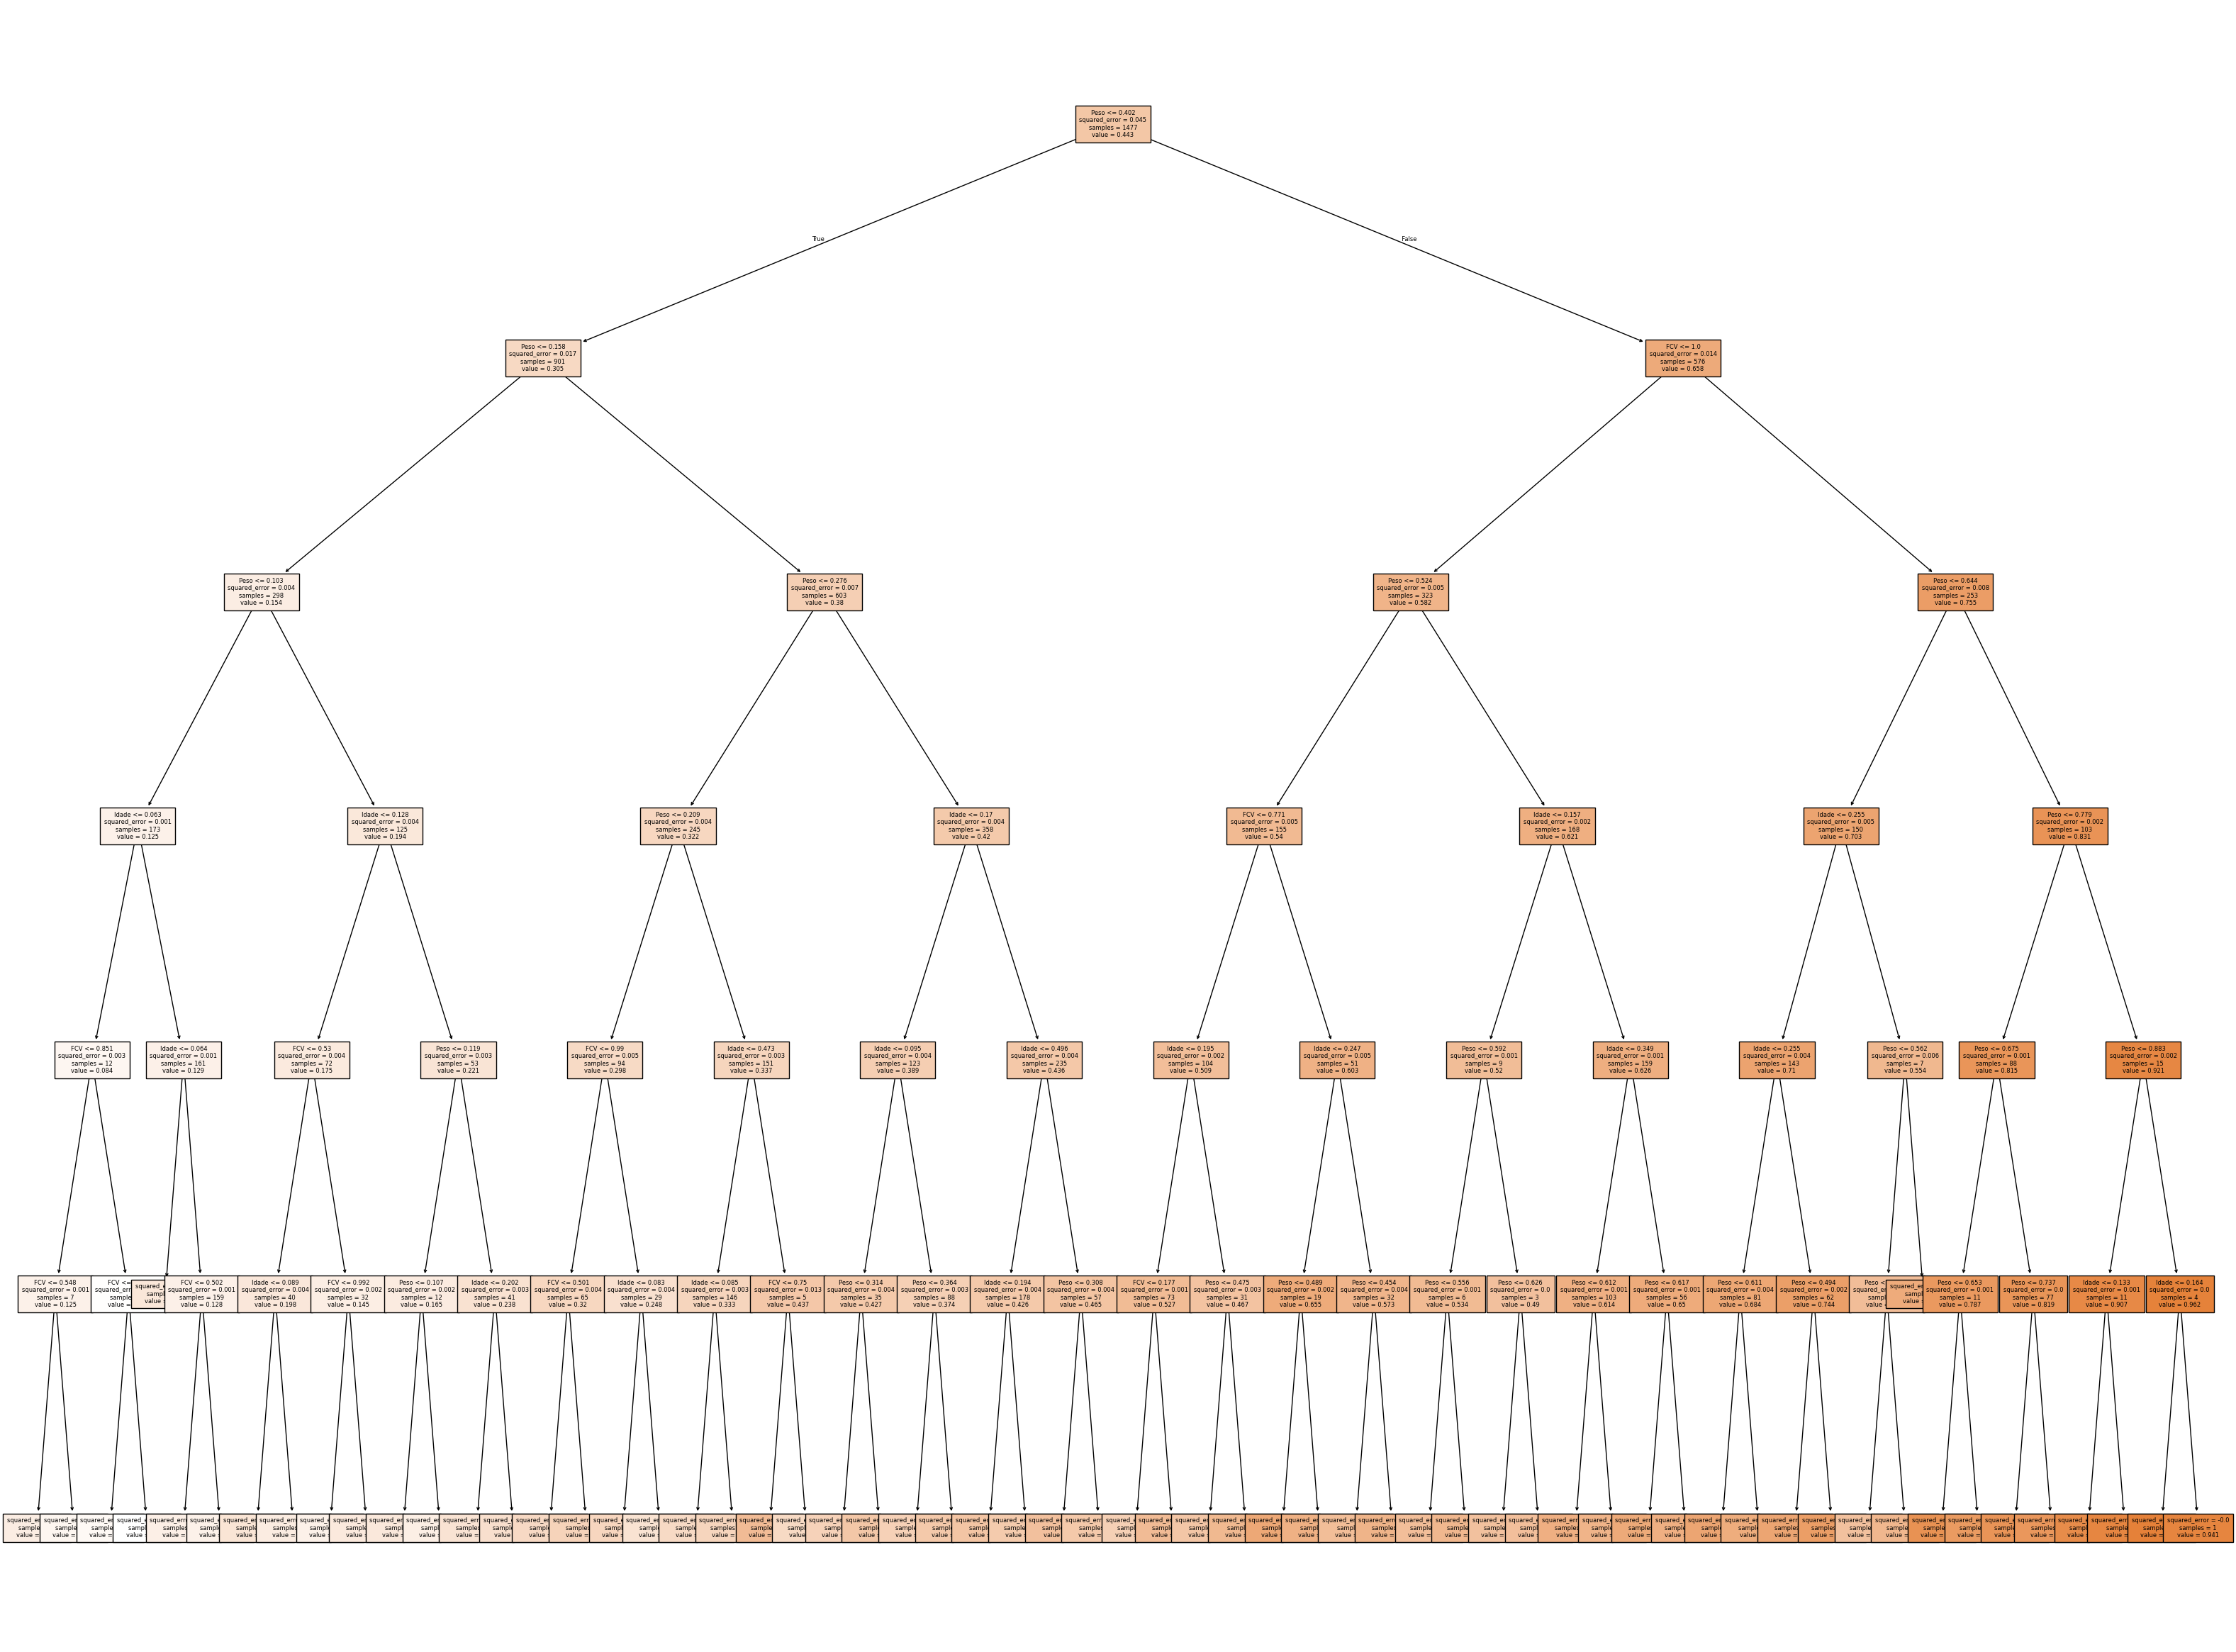

|--- Peso <= 0.40
|   |--- Peso <= 0.16
|   |   |--- Peso <= 0.10
|   |   |   |--- Idade <= 0.06
|   |   |   |   |--- FCV <= 0.85
|   |   |   |   |   |--- FCV <= 0.55
|   |   |   |   |   |   |--- value: [0.15]
|   |   |   |   |   |--- FCV >  0.55
|   |   |   |   |   |   |--- value: [0.09]
|   |   |   |   |--- FCV >  0.85
|   |   |   |   |   |--- FCV <= 0.96
|   |   |   |   |   |   |--- value: [0.07]
|   |   |   |   |   |--- FCV >  0.96
|   |   |   |   |   |   |--- value: [0.02]
|   |   |   |--- Idade >  0.06
|   |   |   |   |--- Idade <= 0.06
|   |   |   |   |   |--- value: [0.20]
|   |   |   |   |--- Idade >  0.06
|   |   |   |   |   |--- FCV <= 0.50
|   |   |   |   |   |   |--- value: [0.14]
|   |   |   |   |   |--- FCV >  0.50
|   |   |   |   |   |   |--- value: [0.12]
|   |   |--- Peso >  0.10
|   |   |   |--- Idade <= 0.13
|   |   |   |   |--- FCV <= 0.53
|   |   |   |   |   |--- Idade <= 0.09
|   |   |   |   |   |   |--- value: [0.22]
|   |   |   |   |   |--- Idade >  0.09
|   | 

Actual value  Predicted value dtr1
0      0.324503              0.348290
1      0.918202              0.930451
2      0.737101              0.694734
3      0.427048              0.529186
4      0.525597              0.489743

In [237]:
X = data_norm[['Peso','FCV','Idade']].to_numpy()
y = data_norm['IMC'].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)
tree = DecisionTreeRegressor(random_state=100, max_depth=6, min_samples_split=3)
tree.fit(X_train,y_train)
y_pred_dtr1 = tree.predict(X_test)


plt.figure(figsize=(40, 30))
plot_tree(tree, feature_names=['Peso', 'FCV', 'Idade'],
          filled=True, fontsize=6)
plt.show()

print(export_text(tree, feature_names=['Peso', 'FCV', 'Idade'],show_weights=True))

tree_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value dtr1': y_pred_dtr1})
tree_diff.head()

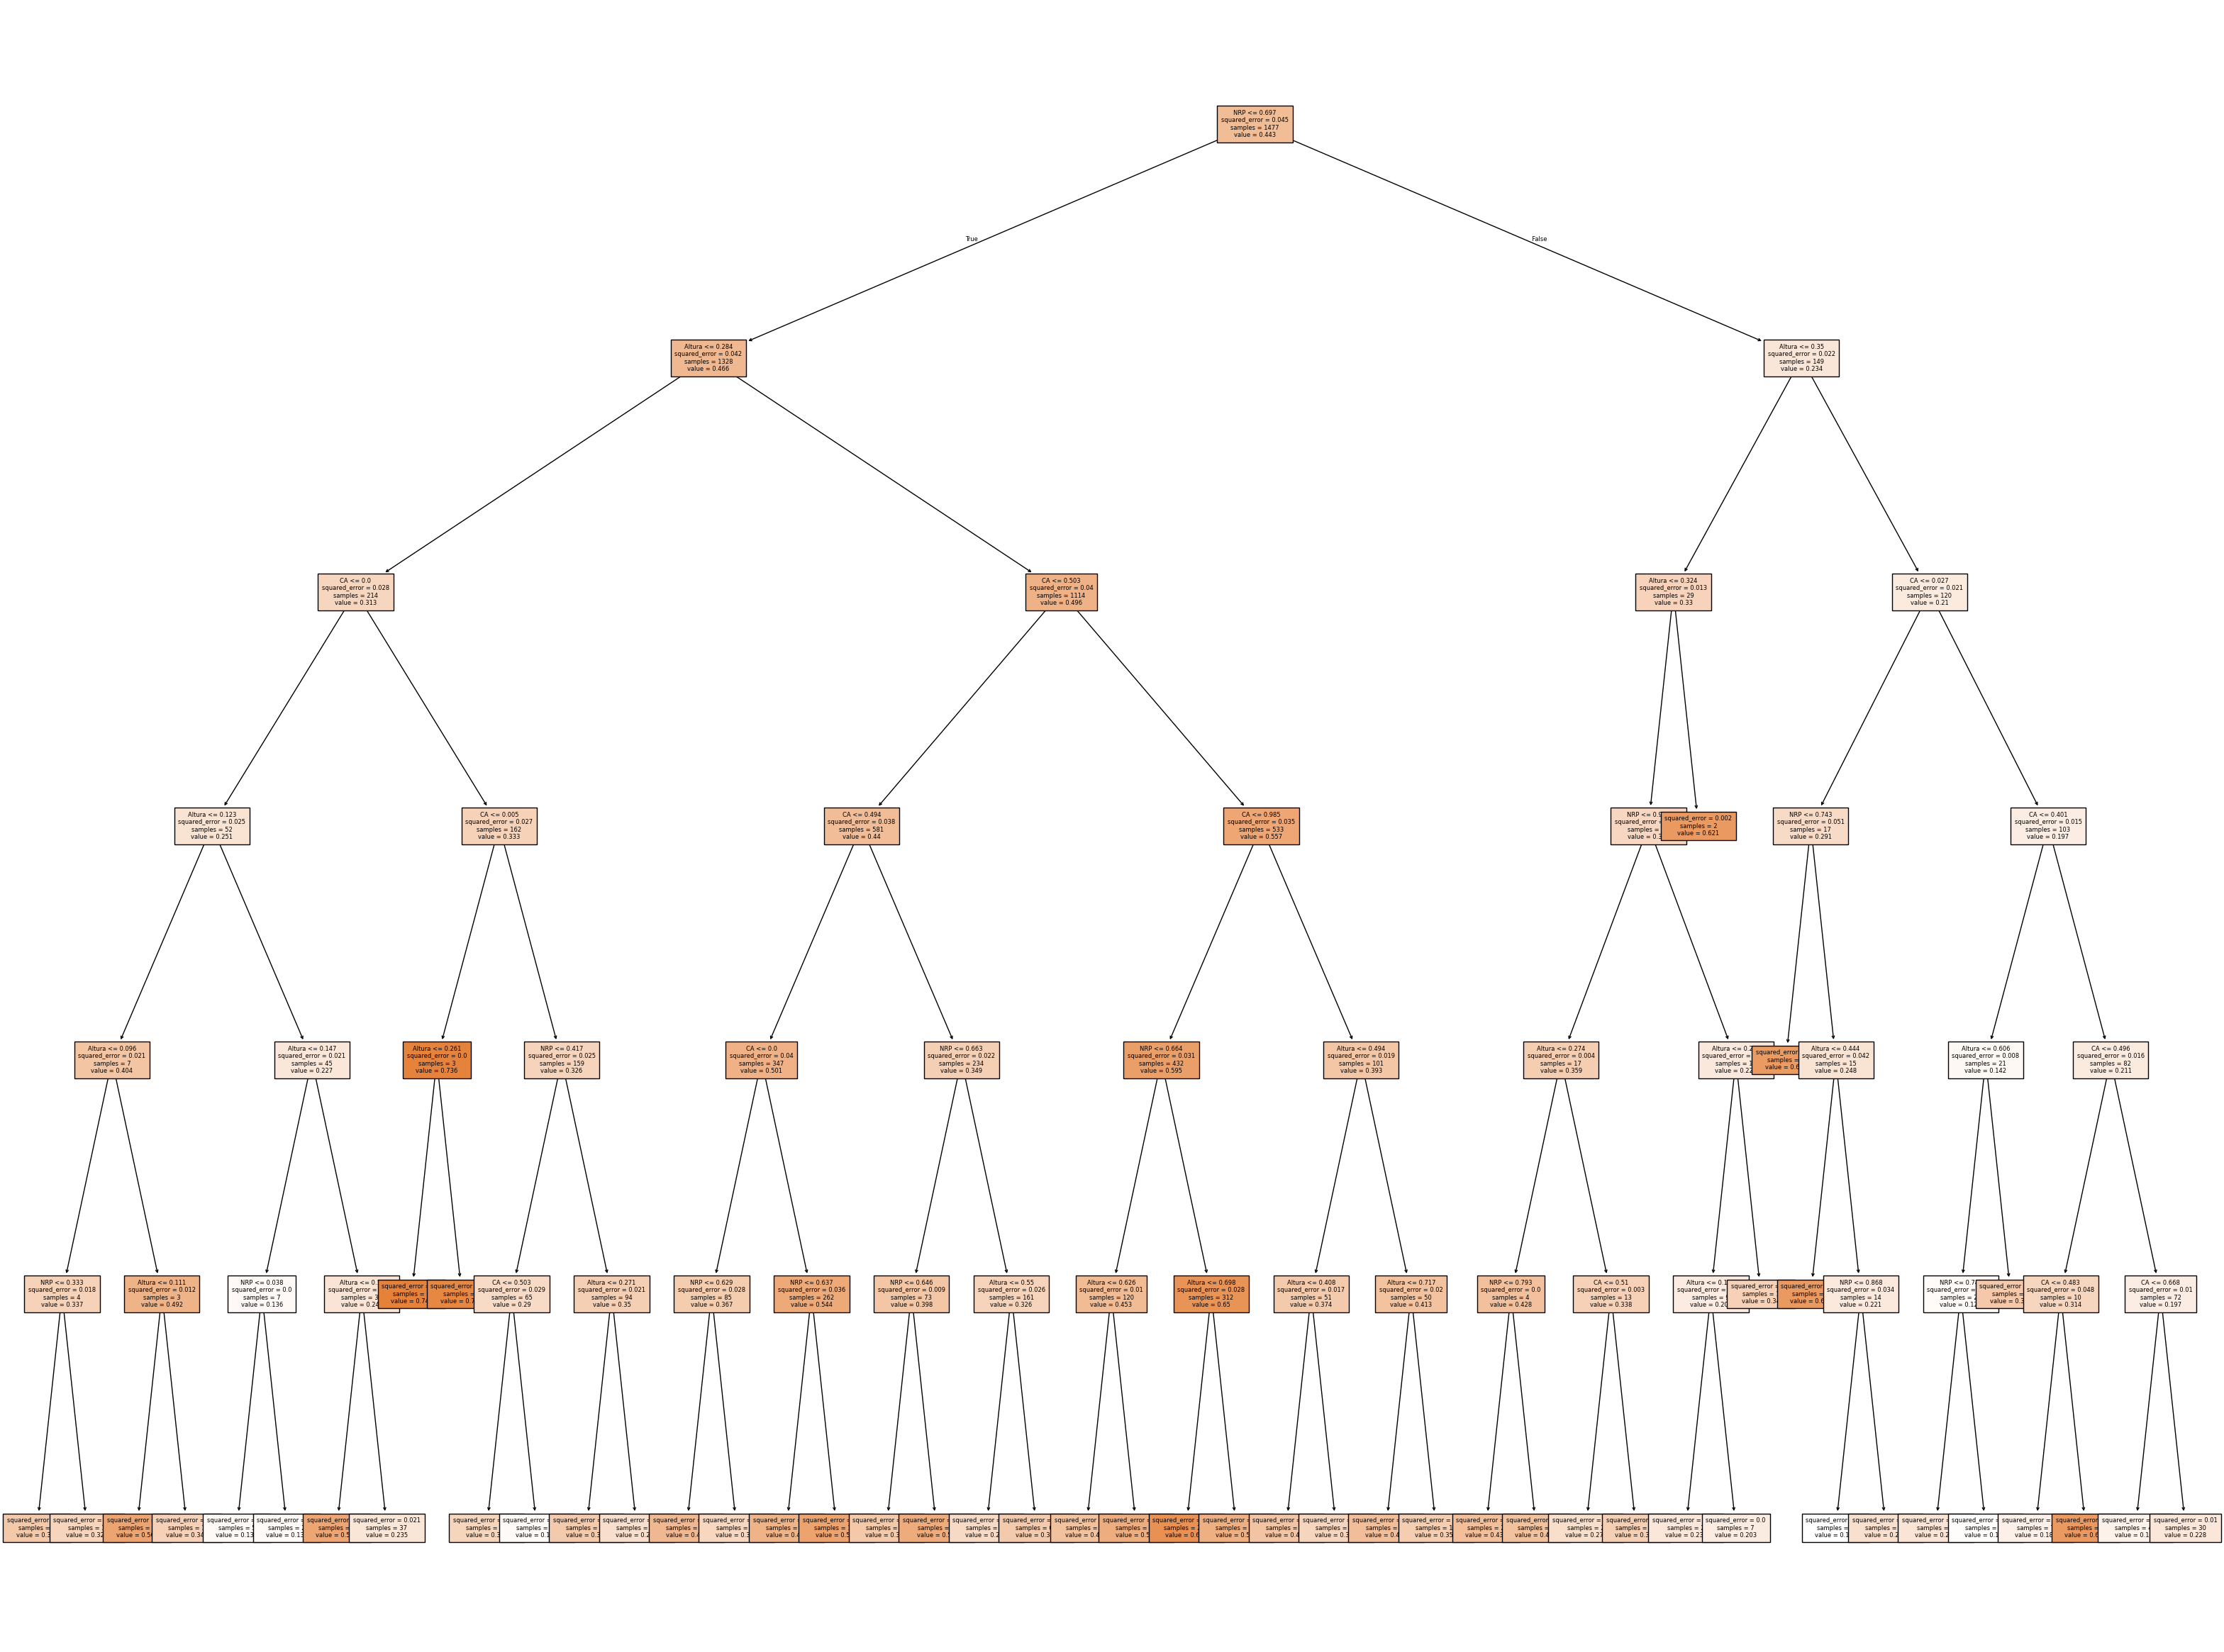

|--- NRP <= 0.70
|   |--- Altura <= 0.28
|   |   |--- CA <= 0.00
|   |   |   |--- Altura <= 0.12
|   |   |   |   |--- Altura <= 0.10
|   |   |   |   |   |--- NRP <= 0.33
|   |   |   |   |   |   |--- value: [0.38]
|   |   |   |   |   |--- NRP >  0.33
|   |   |   |   |   |   |--- value: [0.32]
|   |   |   |   |--- Altura >  0.10
|   |   |   |   |   |--- Altura <= 0.11
|   |   |   |   |   |   |--- value: [0.57]
|   |   |   |   |   |--- Altura >  0.11
|   |   |   |   |   |   |--- value: [0.34]
|   |   |   |--- Altura >  0.12
|   |   |   |   |--- Altura <= 0.15
|   |   |   |   |   |--- NRP <= 0.04
|   |   |   |   |   |   |--- value: [0.14]
|   |   |   |   |   |--- NRP >  0.04
|   |   |   |   |   |   |--- value: [0.13]
|   |   |   |   |--- Altura >  0.15
|   |   |   |   |   |--- Altura <= 0.15
|   |   |   |   |   |   |--- value: [0.56]
|   |   |   |   |   |--- Altura >  0.15
|   |   |   |   |   |   |--- value: [0.24]
|   |   |--- CA >  0.00
|   |   |   |--- CA <= 0.01
|   |   |   |   |--- Al

Actual value  Predicted value dtr2
0      0.324503              0.382112
1      0.918202              0.664668
2      0.737101              0.664668
3      0.427048              0.524746
4      0.525597              0.319332

In [238]:
X = data_norm[['NRP','Altura','CA']].to_numpy()
y = data_norm['IMC'].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)
tree = DecisionTreeRegressor(random_state=100, max_depth=6, min_samples_split=3)
tree.fit(X_train,y_train)
y_pred_dtr2 = tree.predict(X_test)


plt.figure(figsize=(40, 30))
plot_tree(tree, feature_names=['NRP', 'Altura', 'CA'],
          filled=True, fontsize=6)
plt.show()

print(export_text(tree, feature_names=['NRP', 'Altura', 'CA'],show_weights=True))

tree_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value dtr2': y_pred_dtr2})
tree_diff.head()

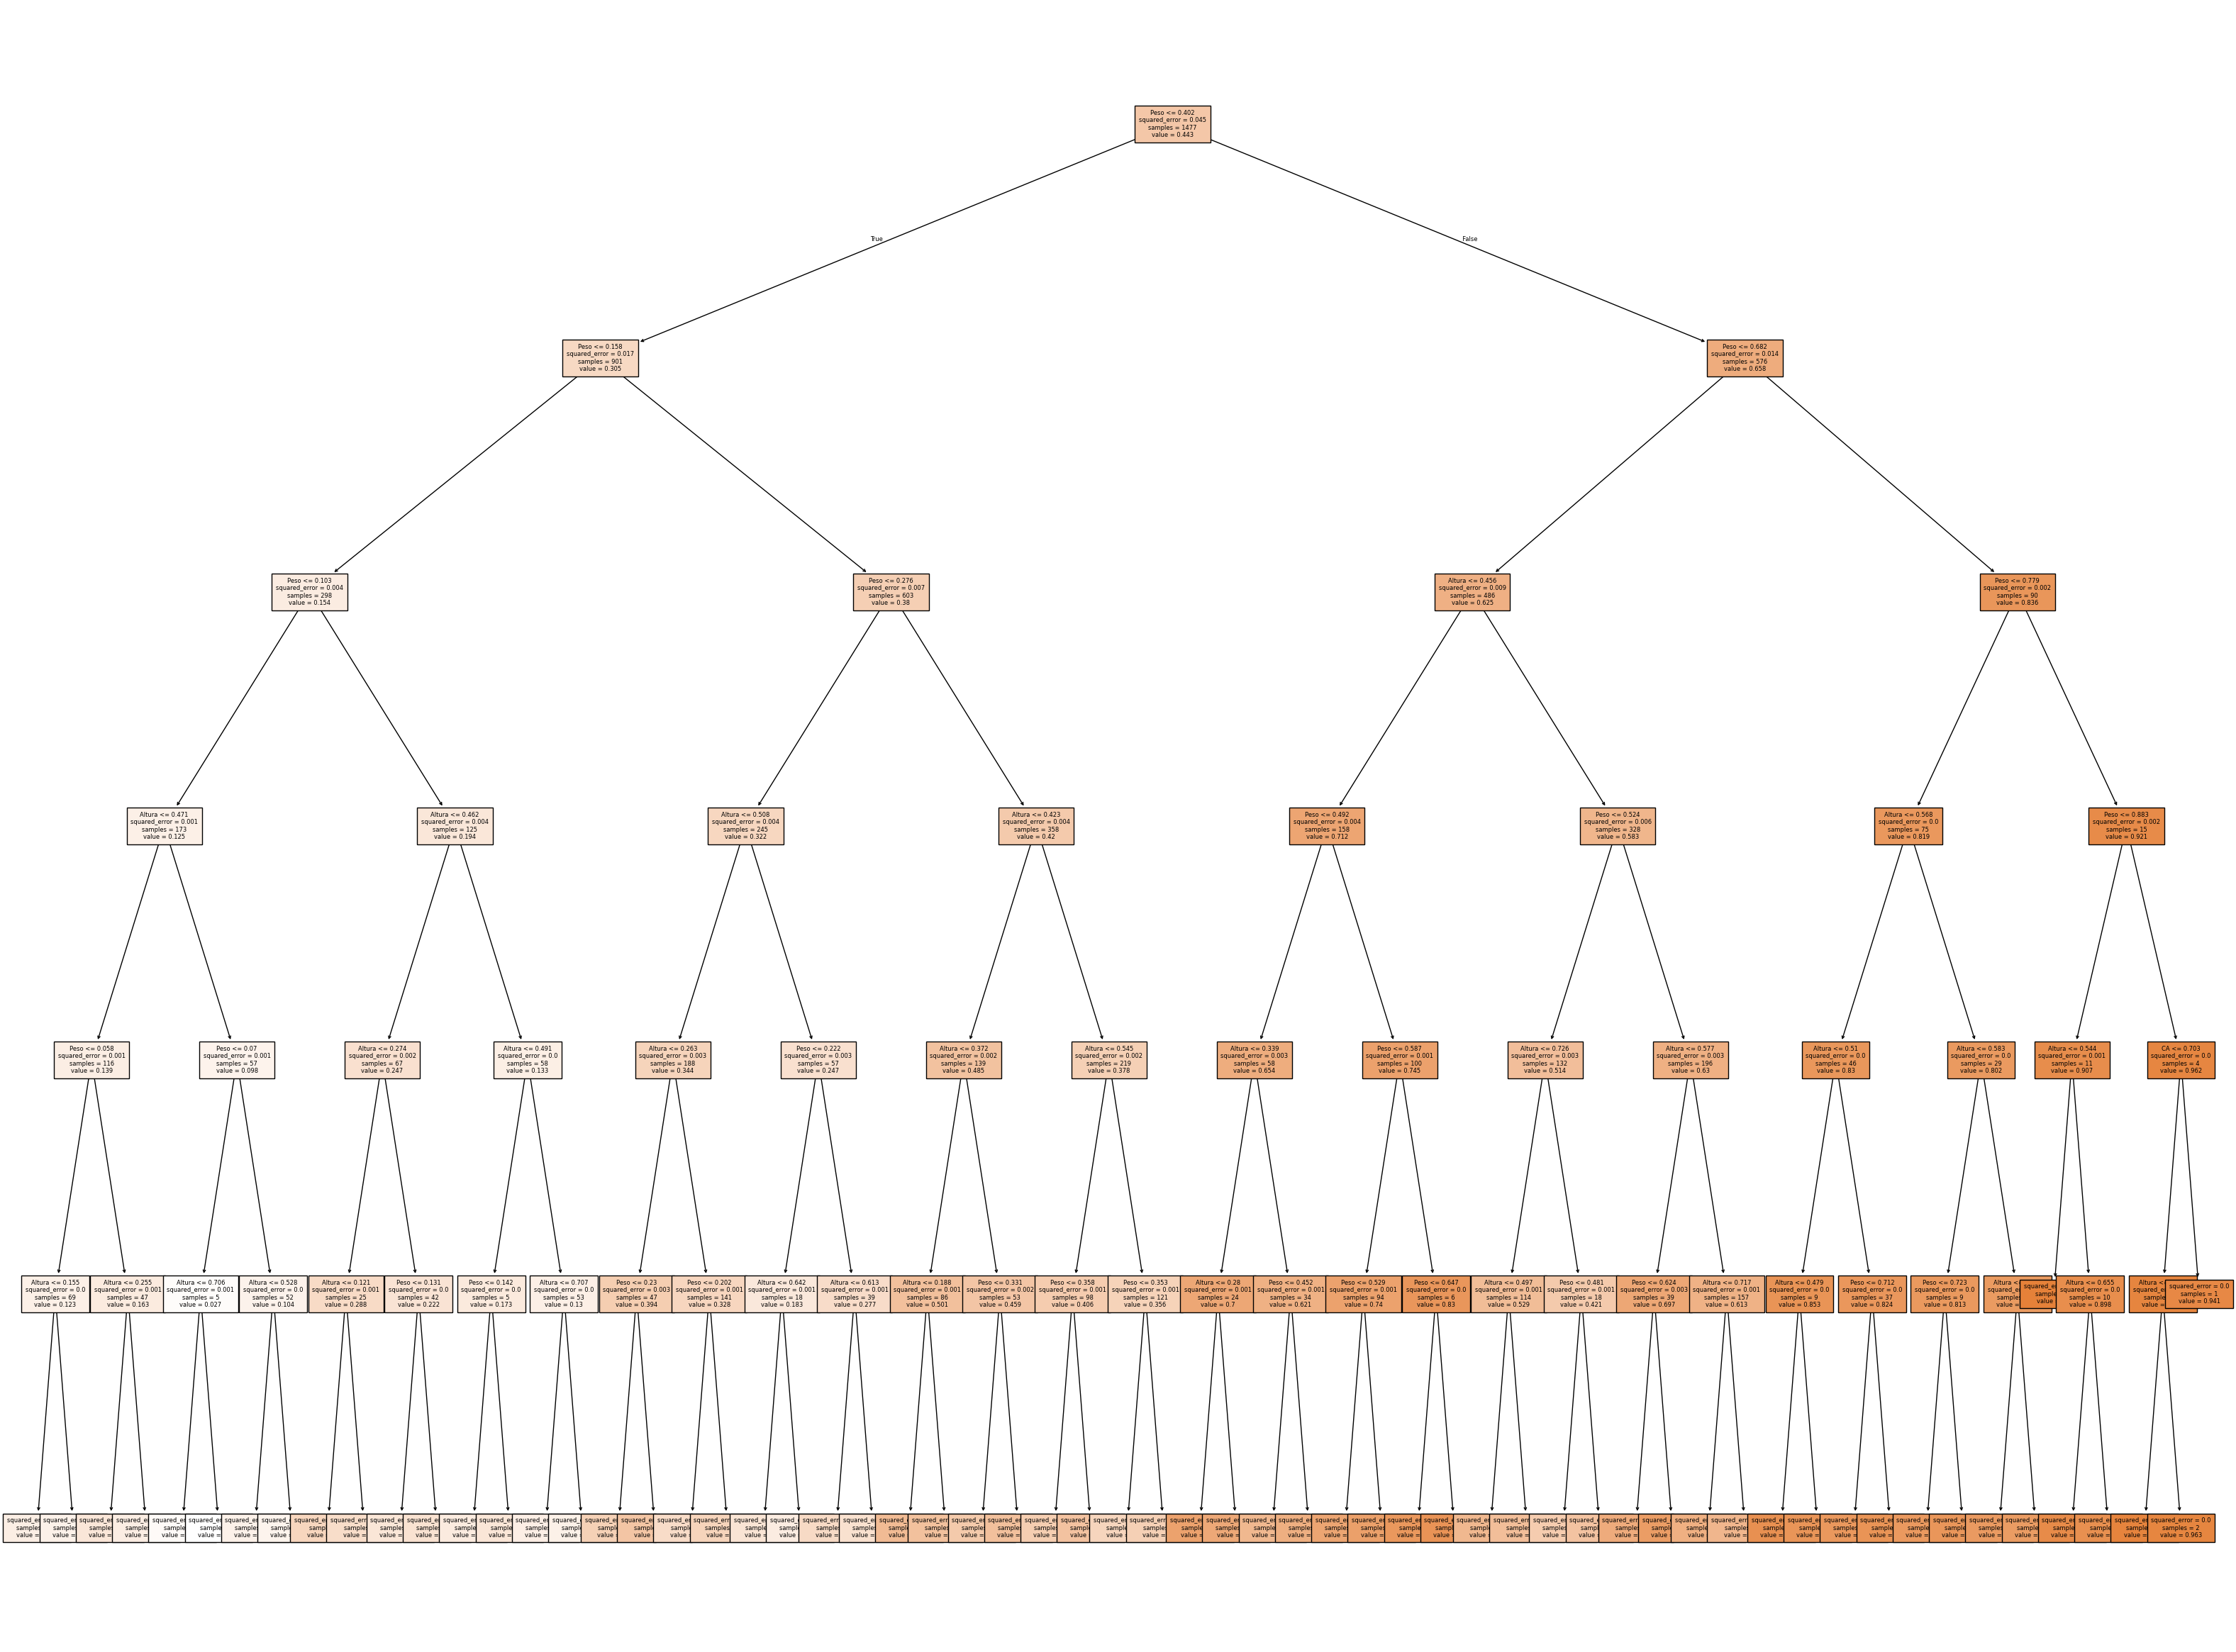

|--- Peso <= 0.40
|   |--- Peso <= 0.16
|   |   |--- Peso <= 0.10
|   |   |   |--- Altura <= 0.47
|   |   |   |   |--- Peso <= 0.06
|   |   |   |   |   |--- Altura <= 0.16
|   |   |   |   |   |   |--- value: [0.14]
|   |   |   |   |   |--- Altura >  0.16
|   |   |   |   |   |   |--- value: [0.12]
|   |   |   |   |--- Peso >  0.06
|   |   |   |   |   |--- Altura <= 0.25
|   |   |   |   |   |   |--- value: [0.20]
|   |   |   |   |   |--- Altura >  0.25
|   |   |   |   |   |   |--- value: [0.15]
|   |   |   |--- Altura >  0.47
|   |   |   |   |--- Peso <= 0.07
|   |   |   |   |   |--- Altura <= 0.71
|   |   |   |   |   |   |--- value: [0.04]
|   |   |   |   |   |--- Altura >  0.71
|   |   |   |   |   |   |--- value: [0.00]
|   |   |   |   |--- Peso >  0.07
|   |   |   |   |   |--- Altura <= 0.53
|   |   |   |   |   |   |--- value: [0.11]
|   |   |   |   |   |--- Altura >  0.53
|   |   |   |   |   |   |--- value: [0.09]
|   |   |--- Peso >  0.10
|   |   |   |--- Altura <= 0.46
|   |   |   

Actual value  Predicted value dtr3
0      0.324503              0.282951
1      0.918202              0.883154
2      0.737101              0.751618
3      0.427048              0.517773
4      0.525597              0.495117

In [239]:
X = data_norm[['Peso','Altura','CA']].to_numpy()
y = data_norm['IMC'].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)
tree = DecisionTreeRegressor(random_state=100, max_depth=6, min_samples_split=3)
tree.fit(X_train,y_train)
y_pred_dtr3 = tree.predict(X_test)


plt.figure(figsize=(40, 30))
plot_tree(tree, feature_names=['Peso', 'Altura', 'CA'],
          filled=True, fontsize=6)
plt.show()

print(export_text(tree, feature_names=['Peso', 'Altura', 'CA'],show_weights=True))

tree_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value dtr3': y_pred_dtr3})
tree_diff.head()

Apesar da diferença entre os valores obtidos entre os diferentes atributos utilizados na regressão lienar múltipla, é possível afirmar que a árvore de regressão apresenta uma melhor previsão dos valores, sendo que as 3 previsões apresentam valores muito semelhantes entre valor real e previsto

##### c) Rede neuronal usando a função MLPRegressor, fazendo variar os parâmetros e arquitetura do modelo. Apresente a rede obtida. 

In [240]:
# Atributos Peso, FCV e Idade
X = data_norm[['Peso','FCV','Idade']].to_numpy()
y = data_norm['IMC'].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)
nn1 = MLPRegressor(hidden_layer_sizes=1, activation='tanh', solver='lbfgs',max_iter=10000, learning_rate_init=0.005)
nn1.fit(X_train, y_train)
pred11 = nn1.predict(X_test)
nn_diff1 = pd.DataFrame({'Actual value': y_test, 'Predicted value nn 11': pred11})
nn1_head = nn_diff1.head()
print(nn1_head)

nn2 = MLPRegressor(hidden_layer_sizes=3, activation='tanh', solver='lbfgs',max_iter=1000, learning_rate_init=0.001)
nn2.fit(X_train, y_train)
pred21 = nn2.predict(X_test)
nn_diff2 = pd.DataFrame({'Actual value': y_test, 'Predicted value nn 21': pred21})
nn2_head = nn_diff2.head()
print(nn2_head)


nn3 = MLPRegressor(hidden_layer_sizes=[6,2], activation='tanh', solver='lbfgs',max_iter=2000, learning_rate_init=0.001)
nn3.fit(X_train, y_train)
pred31 = nn3.predict(X_test)
nn_diff3 = pd.DataFrame({'Actual value': y_test, 'Predicted value nn 31': pred31})
nn3_head = nn_diff3.head()
print(nn3_head)

   Actual value  Predicted value nn 11
0      0.324503               0.272406
1      0.918202               0.901224
2      0.737101               0.653946
3      0.427048               0.504542
4      0.525597               0.411839
   Actual value  Predicted value nn 21
0      0.324503               0.250355
1      0.918202               0.867725
2      0.737101               0.677548
3      0.427048               0.495428
4      0.525597               0.415478
   Actual value  Predicted value nn 31
0      0.324503               0.244294
1      0.918202               0.879378
2      0.737101               0.688718
3      0.427048               0.481191
4      0.525597               0.431061


In [241]:
# Atributos NRP, Altura e CA
X = data_norm[['NRP','Altura','CA']].to_numpy()
y = data_norm['IMC'].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)
nn1 = MLPRegressor(hidden_layer_sizes=1, activation='tanh', solver='lbfgs',max_iter=10000, learning_rate_init=0.005)
nn1.fit(X_train, y_train)
pred12 = nn1.predict(X_test)
nn_diff1 = pd.DataFrame({'Actual value': y_test, 'Predicted value nn 12': pred12})
nn1_head = nn_diff1.head()
print(nn1_head)

nn2 = MLPRegressor(hidden_layer_sizes=3, activation='tanh', solver='lbfgs',max_iter=1000, learning_rate_init=0.001)
nn2.fit(X_train, y_train)
pred22 = nn2.predict(X_test)
nn_diff2 = pd.DataFrame({'Actual value': y_test, 'Predicted value nn 22': pred22})
nn2_head = nn_diff2.head()
print(nn2_head)


nn3 = MLPRegressor(hidden_layer_sizes=[6,2], activation='tanh', solver='lbfgs',max_iter=2000, learning_rate_init=0.001)
nn3.fit(X_train, y_train)
pred32 = nn3.predict(X_test)
nn_diff3 = pd.DataFrame({'Actual value': y_test, 'Predicted value nn 32': pred32})
nn3_head = nn_diff3.head()
print(nn3_head)

   Actual value  Predicted value nn 12
0      0.324503               0.395911
1      0.918202               0.483027
2      0.737101               0.464032
3      0.427048               0.483923
4      0.525597               0.371396
   Actual value  Predicted value nn 22
0      0.324503               0.333645
1      0.918202               0.518998
2      0.737101               0.498742
3      0.427048               0.565060
4      0.525597               0.315778
   Actual value  Predicted value nn 32
0      0.324503               0.376020
1      0.918202               0.640659
2      0.737101               0.640640
3      0.427048               0.461453
4      0.525597               0.373533


In [242]:
# Atributos Peso, Altura e CA
X = data_norm[['Peso','Altura','CA']].to_numpy()
y = data_norm['IMC'].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)
nn1 = MLPRegressor(hidden_layer_sizes=1, activation='tanh', solver='lbfgs',max_iter=10000, learning_rate_init=0.005)
nn1.fit(X_train, y_train)
pred13 = nn1.predict(X_test)
nn_diff1 = pd.DataFrame({'Actual value': y_test, 'Predicted value nn 13': pred13})
nn1_head = nn_diff1.head()
print(nn1_head)

nn2 = MLPRegressor(hidden_layer_sizes=3, activation='tanh', solver='lbfgs',max_iter=1000, learning_rate_init=0.001)
nn2.fit(X_train, y_train)
pred23 = nn2.predict(X_test)
nn_diff2 = pd.DataFrame({'Actual value': y_test, 'Predicted value nn 23': pred23})
nn2_head = nn_diff2.head()
print(nn2_head)


nn3 = MLPRegressor(hidden_layer_sizes=[6,2], activation='tanh', solver='lbfgs',max_iter=2000, learning_rate_init=0.001)
nn3.fit(X_train, y_train)
pred33 = nn3.predict(X_test)
nn_diff3 = pd.DataFrame({'Actual value': y_test, 'Predicted value nn 33': pred33})
nn3_head = nn_diff3.head()
print(nn3_head)

   Actual value  Predicted value nn 13
0      0.324503               0.332203
1      0.918202               0.959161
2      0.737101               0.712682
3      0.427048               0.431725
4      0.525597               0.506022
   Actual value  Predicted value nn 23
0      0.324503               0.326116
1      0.918202               0.934346
2      0.737101               0.728161
3      0.427048               0.422985
4      0.525597               0.522382
   Actual value  Predicted value nn 33
0      0.324503               0.319146
1      0.918202               0.899371
2      0.737101               0.738764
3      0.427048               0.425216
4      0.525597               0.526005


Através do uso de diferentes nós nas redes neuronais prevemos os valores utilizando os diferentes atributos, mais uma vez sendo possivel afirmar que os valores que dão previsões mais corretas são Peso, Altura e CA

8. Compare os resultados obtidos pelos modelos referidos na questão 7, usando o erro médio absoluto (MAE) e a raiz quadrada do erro médio (RMSE). 

Através dos resultados do exercício 7 podemos concluir que os melhores atributos para prever o IMC são Peso, Altura e CA, sendo assim, para determinar os melhores modelos apenas iremos utlizar os resultados dos 3 modelos referentes a esses atributos

In [243]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
# Calcular o erro médio absoluto (MAE) para cada modelo
mae_mlr1 = mean_absolute_error(y_test, y_pred_mlr1)
mae_dtr1 = mean_absolute_error(y_test, y_pred_dtr1)
mae_nn1 = mean_absolute_error(y_test, pred31)

# Calcular a raiz quadrada do erro médio (RMSE) para cada modelo
rmse_mlr1 = np.sqrt(mean_squared_error(y_test, y_pred_mlr1))
rmse_dtr1 = np.sqrt(mean_squared_error(y_test, y_pred_dtr1))
rmse_nn1 = np.sqrt(mean_squared_error(y_test, pred31))

print(f"Erro Médio Absoluto atributos 1 (MAE):")
print(f"Regressão Linear Múltipla: {mae_mlr1:.4f}")
print(f"Árvore de Regressão: {mae_dtr1:.4f}")
print(f"Rede Neuronal: {mae_nn1:.4f}")

print(f"Raiz quadrada do erro médio atributos 1 (RMSE):")
print(f"Regressão Linear Múltipla: {rmse_mlr1:.4f}")
print(f"Árvore de Regressão: {rmse_dtr1:.4f}")
print(f"Rede Neuronal: {rmse_nn1:.4f}")

print()
# Calcular o erro médio absoluto (MAE) para cada modelo
mae_mlr2 = mean_absolute_error(y_test, y_pred_mlr2)
mae_dtr2 = mean_absolute_error(y_test, y_pred_dtr2)
mae_nn2 = mean_absolute_error(y_test, pred32)

# Calcular a raiz quadrada do erro médio (RMSE) para cada modelo
rmse_mlr2 = np.sqrt(mean_squared_error(y_test, y_pred_mlr2))
rmse_dtr2 = np.sqrt(mean_squared_error(y_test, y_pred_dtr2))
rmse_nn2 = np.sqrt(mean_squared_error(y_test, pred32))

print(f"Erro Médio Absoluto atributos 2 (MAE):")
print(f"Regressão Linear Múltipla: {mae_mlr2:.4f}")
print(f"Árvore de Regressão: {mae_dtr2:.4f}")
print(f"Rede Neuronal: {mae_nn2:.4f}")

print(f"Raiz quadrada do erro médio atributos 2 (RMSE):")
print(f"Regressão Linear Múltipla: {rmse_mlr2:.4f}")
print(f"Árvore de Regressão: {rmse_dtr2:.4f}")
print(f"Rede Neuronal: {rmse_nn2:.4f}")

print()
# Calcular o erro médio absoluto (MAE) para cada modelo
mae_mlr3 = mean_absolute_error(y_test, y_pred_mlr3)
mae_dtr3 = mean_absolute_error(y_test, y_pred_dtr3)
mae_nn3 = mean_absolute_error(y_test, pred33)

# Calcular a raiz quadrada do erro médio (RMSE) para cada modelo
rmse_mlr3 = np.sqrt(mean_squared_error(y_test, y_pred_mlr3))
rmse_dtr3 = np.sqrt(mean_squared_error(y_test, y_pred_dtr3))
rmse_nn3 = np.sqrt(mean_squared_error(y_test, pred33))

print(f"Erro Médio Absoluto atributos 3 (MAE):")
print(f"Regressão Linear Múltipla: {mae_mlr3:.4f}")
print(f"Árvore de Regressão: {mae_dtr3:.4f}")
print(f"Rede Neuronal: {mae_nn3:.4f}")

print(f"Raiz quadrada do erro médio atributos 3 (RMSE):")
print(f"Regressão Linear Múltipla: {rmse_mlr3:.4f}")
print(f"Árvore de Regressão: {rmse_dtr3:.4f}")
print(f"Rede Neuronal: {rmse_nn3:.4f}")

Erro Médio Absoluto atributos 1 (MAE):
Regressão Linear Múltipla: 0.0601
Árvore de Regressão: 0.0378
Rede Neuronal: 0.0537
Raiz quadrada do erro médio atributos 1 (RMSE):
Regressão Linear Múltipla: 0.0741
Árvore de Regressão: 0.0517
Rede Neuronal: 0.0657

Erro Médio Absoluto atributos 2 (MAE):
Regressão Linear Múltipla: 0.1726
Árvore de Regressão: 0.1288
Rede Neuronal: 0.1326
Raiz quadrada do erro médio atributos 2 (RMSE):
Regressão Linear Múltipla: 0.2084
Árvore de Regressão: 0.1693
Rede Neuronal: 0.1706

Erro Médio Absoluto atributos 3 (MAE):
Regressão Linear Múltipla: 0.0162
Árvore de Regressão: 0.0215
Rede Neuronal: 0.0040
Raiz quadrada do erro médio atributos 3 (RMSE):
Regressão Linear Múltipla: 0.0219
Árvore de Regressão: 0.0286
Rede Neuronal: 0.0053


9. Justifique se os resultados obtidos para os dois melhores modelos são estatisticamente significativos (para um nível de significância de 5%). Identifique o modelo que apresenta o melhor desempenho. 

In [244]:
# Teste de Wilcoxon modelo 1
wilcox_stat, wilcox_pvalue = wilcoxon(y_pred_dtr1, pred31)
print("Wilcoxon Test atributos 1:")
print("Test Statistic:", wilcox_stat)
print("p-value:", wilcox_pvalue)
alpha = 0.05
if wilcox_pvalue < alpha:
    print("Existe uma diferença significativa entre os grupos.")
else:
    print("Não existe uma diferença significativa entre os grupos.")
print()

# Teste de Wilcoxon modelo 2
wilcox_stat, wilcox_pvalue = wilcoxon(y_pred_dtr2, pred32)
print("Wilcoxon Test atributos 2:")
print("Test Statistic:", wilcox_stat)
print("p-value:", wilcox_pvalue)
alpha = 0.05
if wilcox_pvalue < alpha:
    print("Existe uma diferença significativa entre os grupos.")
else:
    print("Não existe uma diferença significativa entre os grupos.")
print()

# Teste de Wilcoxon modelo 3
wilcox_stat, wilcox_pvalue = wilcoxon(y_pred_mlr3, pred33)
print("Wilcoxon Test atibtutos 3:")
print("Test Statistic:", wilcox_stat)
print("p-value:", wilcox_pvalue)

alpha = 0.05
if wilcox_pvalue < alpha:
    print("Existe uma diferença significativa entre os grupos.")
else:
    print("Não existe uma diferença significativa entre os grupos.")

Wilcoxon Test atributos 1:
Test Statistic: 95616.0
p-value: 0.27547621988552395
Não existe uma diferença significativa entre os grupos.

Wilcoxon Test atributos 2:
Test Statistic: 97859.0
p-value: 0.5455870617334062
Não existe uma diferença significativa entre os grupos.

Wilcoxon Test atibtutos 3:
Test Statistic: 91472.0
p-value: 0.046732407790447426
Existe uma diferença significativa entre os grupos.
